### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> ReneWind
    
### <span style="font-weight:bold; color:dark green"> Context:

<p style='text-align: justify;'> Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.</p>

<p style='text-align: justify;'>Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.</p>

<p style='text-align: justify;'>Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.</p>

<p style='text-align: justify;'>The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).</p> 



### <span style="font-weight:bold; color:dark green"> Objective

<p style='text-align: justify;'>“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.</p>

<p style='text-align: justify;'>The objective is to build various classification models, tune them and find the best one that will help identify failures so that the generator could be repaired before failing/breaking and the overall maintenance cost of the generators can be brought down.</p> 

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a wind turbine where there is no detection by model. 
- False positives (FP) are detections in a wind turbine where there is no failure. 

So, the maintenance cost associated with the model would be:

**Maintenance cost** = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
where,

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

- The minimum possible maintenance cost  =  `Actual failures*(Repair cost) = (TP + FN)*(Repair cost)`
- The maintenance cost associated with model = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`

So, we will try to maximize the ratio of minimum possible maintenance cost and the maintenance cost associated with the model.

The value of this ratio will lie between 0 and 1, the ratio will be 1 only when the maintenance cost associated with the model will be equal to the minimum possible maintenance cost.

### <span style="font-weight:bold; color:dark green"> Data Description

- The data provided is a transformed version of original data which was collected using sensors.
- `Train.csv` - To be used for training and tuning of models. 
- `Test.csv` - To be used only for testing the performance of the final best model.
- Both the datasets consist of `40 predictor variables and 1 target variable.`

### <span style="font-weight:bold; color:dark blue"> Importing necessary libraries and data

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

!pip install imblearn
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
!pip install xgboost

<IPython.core.display.Javascript object>

### <span style="font-weight:bold; color:dark blue"> Data Overview

- Observations
- Sanity checks

#### Read the csv file

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# copying data to another varaible to avoid any changes to original data
data = train_data.copy()
test = test_data.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


<IPython.core.display.Javascript object>

### <span style="font-weight:bold; color:dark blue"> Preparing the Data

**Although all our EDA analysis will be solely based on Training Dataset, in the below few lines we are assessing any observations related to both data set (Training & Testing).**

In [6]:
# The code shows the number of rows and columns in the dataset.
data.shape

(40000, 41)

<IPython.core.display.Javascript object>

In [7]:
test.shape

(10000, 41)

<IPython.core.display.Javascript object>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Both Training & Testing dataset have 40 independent variables (all float) and one last dependent variable (target) which shoud be converted into **Category** at later stage.

#### Check for missing values.

In [10]:
# Missing values in the Training Dataset.
data.isnull().sum().sum()

85

<IPython.core.display.Javascript object>

In [11]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

V1       0.120
V2       0.100
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. There are 85 missing values in the Training Dataset. 
2. V1 has 0.12% missing values, while V2 has 0.1% missing values of the total. 
3. Missing values will be treated after spliting the dataset for modelling. 

In [12]:
# Missing values in the Testing Dataset.
test.isnull().sum().sum()

18

<IPython.core.display.Javascript object>

In [13]:
# let's check for missing values in the data
round(test.isnull().sum() / test.isnull().count() * 100, 2)

V1       0.110
V2       0.070
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. There are 18 missing values in the Training Dataset. 
2. V1 has 0.11% missing values, while V2 has 0.07% missing values of the total. 
3. Missing values will be treated later during the modelling stage.

#### Let's check the duplicate data. And if any, we should remove it.

In [14]:
data[data.duplicated()].count().sum()

0

<IPython.core.display.Javascript object>

In [15]:
test[test.duplicated()].count().sum()

0

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. There are no duplications either at the training nor the testing dataset. 

In [16]:
# # converting target to category
# data["Target"] = data["Target"].astype("category")
# test["Target"] = test["Target"].astype("category")

<IPython.core.display.Javascript object>

### <span style="font-weight:bold; color:dark blue"> Extracting basic inforamtion from the available dataset

In [17]:
# Extracting descriptive information related to the Training dataset.
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,39954.000,39961.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,-0.288,0.443,2.506,-0.066,-0.045,-1.001,-0.893,-0.563,-0.008,-0.002,-1.918,1.578,1.591,-0.947,-2.436,-2.943,-0.143,1.189,1.181,0.027,-3.621,0.943,-0.388,1.142,-0.003,1.896,-0.617,-0.888,-1.005,-0.033,0.506,0.327,0.057,-0.464,2.235,1.530,-0.000,-0.351,0.900,-0.897,0.055
std,3.449,3.139,3.406,3.437,2.107,2.037,1.757,3.299,2.162,2.183,3.116,2.915,2.865,1.788,3.341,4.212,3.344,2.586,3.395,3.675,3.557,1.646,4.052,3.913,2.025,3.421,4.392,1.925,2.676,3.031,3.483,5.499,3.574,3.186,2.924,3.820,1.778,3.964,1.751,2.998,0.227
min,-13.502,-13.212,-11.469,-16.015,-8.613,-10.227,-8.206,-15.658,-8.596,-11.001,-14.832,-13.619,-13.830,-8.309,-17.202,-21.919,-17.634,-11.644,-13.492,-13.923,-19.436,-10.122,-16.188,-18.488,-8.228,-12.588,-14.905,-9.685,-12.579,-14.796,-19.377,-23.201,-17.454,-17.985,-15.350,-17.479,-7.640,-17.375,-7.136,-11.930,0.000
25%,-2.751,-1.638,0.203,-2.350,-1.507,-2.363,-2.037,-2.660,-1.494,-1.391,-3.941,-0.431,-0.209,-2.165,-4.451,-5.632,-2.227,-0.403,-1.051,-2.434,-5.921,-0.112,-3.119,-1.483,-1.373,-0.319,-3.692,-2.193,-2.799,-1.908,-1.799,-3.392,-2.238,-2.128,0.332,-0.937,-1.266,-3.017,-0.262,-2.950,0.000
50%,-0.774,0.464,2.265,-0.124,-0.097,-1.007,-0.935,-0.384,-0.052,0.106,-1.942,1.485,1.654,-0.957,-2.399,-2.719,-0.028,0.867,1.278,0.030,-3.559,0.963,-0.275,0.964,0.021,1.964,-0.910,-0.905,-1.206,0.185,0.491,0.056,-0.050,-0.251,2.110,1.572,-0.133,-0.319,0.921,-0.949,0.000
75%,1.837,2.538,4.585,2.149,1.346,0.374,0.207,1.714,1.426,1.486,0.089,3.541,3.476,0.266,-0.382,-0.113,2.072,2.564,3.497,2.513,-1.284,2.018,2.438,3.563,1.400,4.163,2.201,0.377,0.604,2.040,2.778,3.789,2.256,1.433,4.045,3.997,1.161,2.291,2.069,1.092,0.000
max,17.437,13.089,18.366,13.280,9.403,7.065,8.006,11.679,8.507,8.108,13.852,15.754,15.420,6.213,12.875,13.583,17.405,13.180,16.059,16.052,13.840,7.410,15.080,19.769,8.223,16.836,21.595,6.907,11.852,13.191,17.255,24.848,16.692,14.358,16.805,19.330,7.803,15.964,7.998,10.654,1.000


<IPython.core.display.Javascript object>

In [18]:
# data.describe(exclude="number").T

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Based on the above table, most of the variables seem to have right or left skeweness (none of them seems to be extereme in either side. 
2. Most of the variables seem to have large numbers of "Outliers** in either or both sides. 
3. The dataset based on "Target" variable seems to be "imbalanced". Almost 93% of the data shows "none failure".
4. Since we are conducting "Classification"-Logistic Regression, then there is no necessity to treat the Outliers. 

In [19]:
# Extracting descriptive information related to the Training dataset.
test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,9989.000,9993.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,-0.260,0.417,2.555,-0.054,-0.085,-1.014,-0.908,-0.599,0.026,0.019,-1.944,1.551,1.618,-0.941,-2.452,-3.016,-0.154,1.180,1.218,0.078,-3.676,0.950,-0.450,1.093,0.035,1.878,-0.558,-0.885,-1.040,-0.067,0.483,0.253,0.008,-0.423,2.258,1.550,-0.006,-0.373,0.920,-0.937,0.055
std,3.440,3.160,3.395,3.462,2.102,2.039,1.737,3.343,2.180,2.169,3.105,2.906,2.863,1.816,3.324,4.276,3.363,2.566,3.415,3.704,3.579,1.622,4.063,3.915,2.021,3.422,4.402,1.928,2.660,3.039,3.451,5.503,3.552,3.168,2.919,3.794,1.782,3.998,1.726,3.011,0.227
min,-12.382,-11.625,-12.941,-14.682,-7.712,-8.949,-8.124,-12.710,-7.570,-8.291,-15.384,-10.650,-13.832,-7.814,-15.527,-20.986,-13.418,-12.214,-14.170,-13.720,-17.201,-8.832,-15.818,-12.749,-6.770,-11.414,-14.219,-7.933,-10.655,-14.054,-13.878,-20.520,-14.904,-17.135,-19.522,-14.912,-5.362,-15.335,-7.147,-10.779,0.000
25%,-2.700,-1.701,0.238,-2.371,-1.593,-2.377,-2.035,-2.684,-1.490,-1.362,-3.988,-0.465,-0.126,-2.160,-4.429,-5.682,-2.287,-0.401,-1.055,-2.417,-6.022,-0.083,-3.167,-1.577,-1.339,-0.265,-3.634,-2.169,-2.815,-1.950,-1.770,-3.459,-2.280,-2.066,0.375,-0.892,-1.278,-3.004,-0.225,-2.993,0.000
50%,-0.719,0.456,2.283,-0.169,-0.144,-1.015,-0.938,-0.387,-0.086,0.150,-1.970,1.455,1.721,-0.948,-2.408,-2.794,-0.010,0.877,1.326,0.079,-3.654,0.976,-0.259,0.918,0.061,1.973,-0.869,-0.934,-1.264,0.138,0.513,-0.013,-0.099,-0.203,2.149,1.620,-0.150,-0.362,0.933,-0.986,0.000
75%,1.861,2.526,4.656,2.144,1.324,0.354,0.189,1.698,1.466,1.537,0.067,3.516,3.468,0.262,-0.446,-0.120,2.041,2.556,3.576,2.529,-1.307,2.005,2.392,3.537,1.426,4.170,2.253,0.396,0.554,2.002,2.773,3.762,2.198,1.472,4.088,4.061,1.193,2.335,2.097,1.085,0.000
max,13.504,14.079,15.409,12.896,7.673,6.273,7.616,10.792,8.851,7.691,10.226,12.984,12.620,6.180,11.673,13.976,19.777,13.642,13.038,14.497,16.218,7.505,13.511,17.806,6.557,17.528,17.290,7.416,14.039,10.315,13.190,26.539,13.324,14.581,13.489,17.116,7.682,13.726,7.234,10.392,1.000


<IPython.core.display.Javascript object>

In [20]:
# test.describe(exclude="number").T

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Similar observations noted in the above training dataset. 

## <span style="font-weight:bold; color:dark blue"> Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold; color:dark purple"> EDA based on Training Dataset

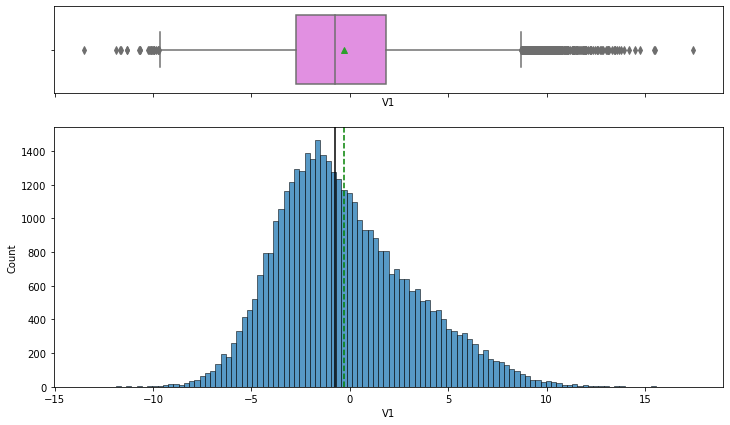

<IPython.core.display.Javascript object>

In [24]:
# Observations on V1
histogram_boxplot(data, "V1")

<AxesSubplot:xlabel='Target', ylabel='V1'>

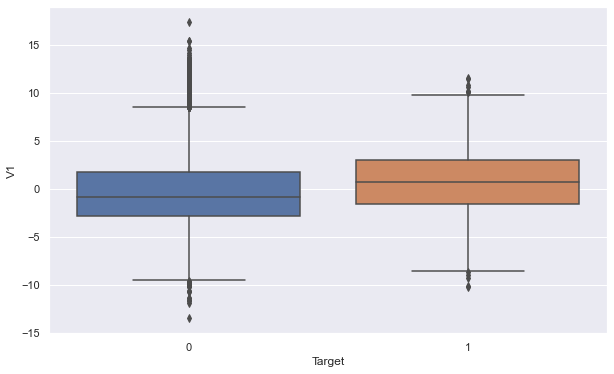

<IPython.core.display.Javascript object>

In [25]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V1", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Slightly right skewed with mean > median. 
2. More outliers observed on the right side. 

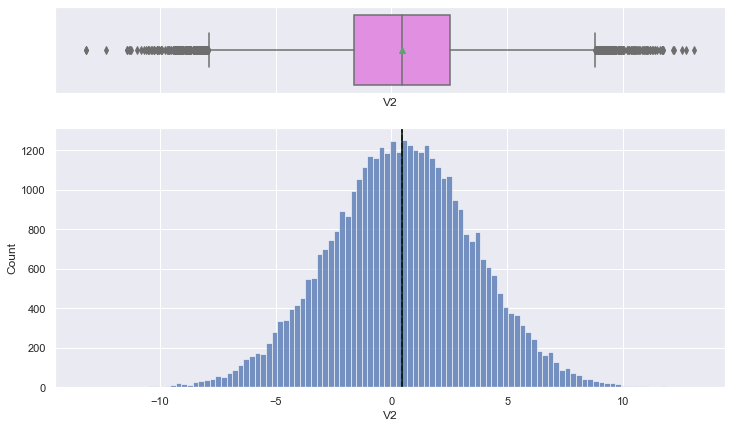

<IPython.core.display.Javascript object>

In [26]:
# Observations on V2
histogram_boxplot(data, "V2")

<AxesSubplot:xlabel='Target', ylabel='V2'>

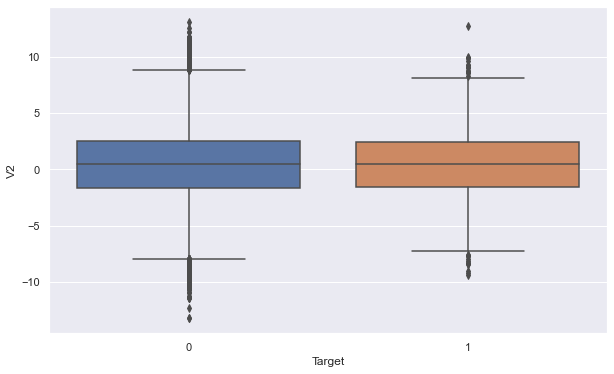

<IPython.core.display.Javascript object>

In [27]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V2", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are almost equal on both sides.

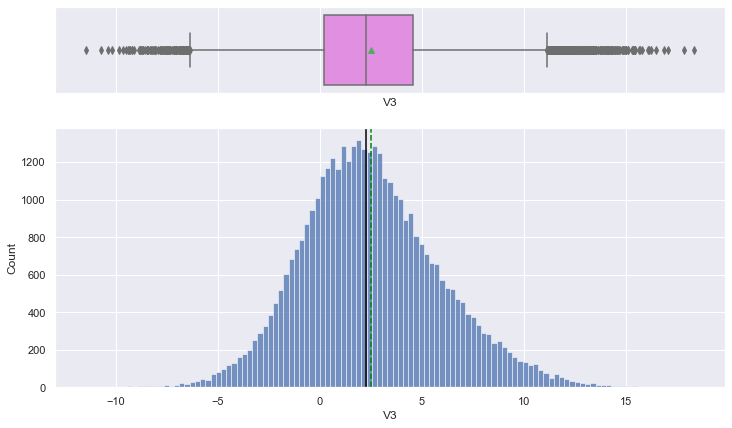

<IPython.core.display.Javascript object>

In [28]:
# Observations on V3
histogram_boxplot(data, "V3")

<AxesSubplot:xlabel='Target', ylabel='V3'>

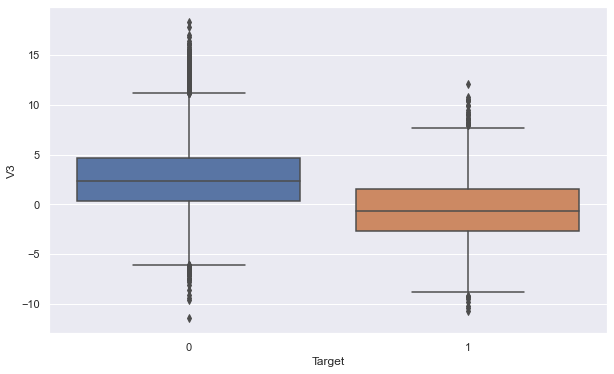

<IPython.core.display.Javascript object>

In [29]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V3", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side. 

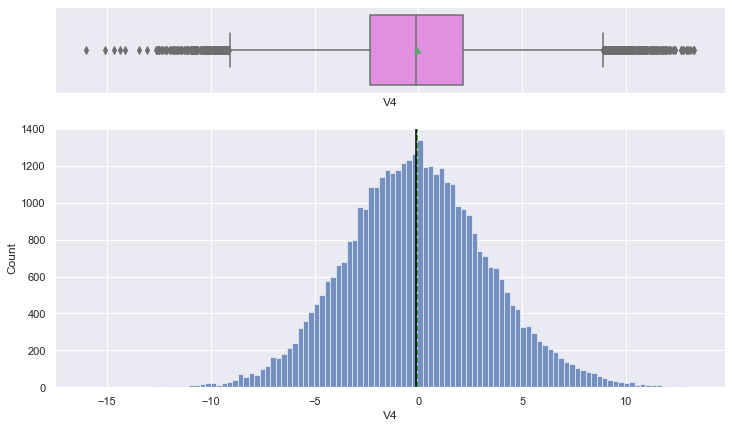

<IPython.core.display.Javascript object>

In [30]:
# Observations on V4
histogram_boxplot(data, "V4")

<AxesSubplot:xlabel='Target', ylabel='V4'>

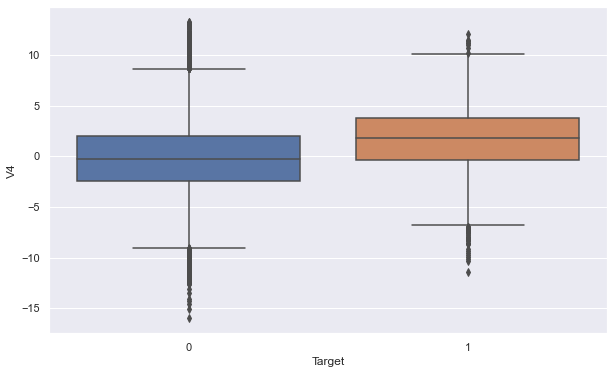

<IPython.core.display.Javascript object>

In [31]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V4", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

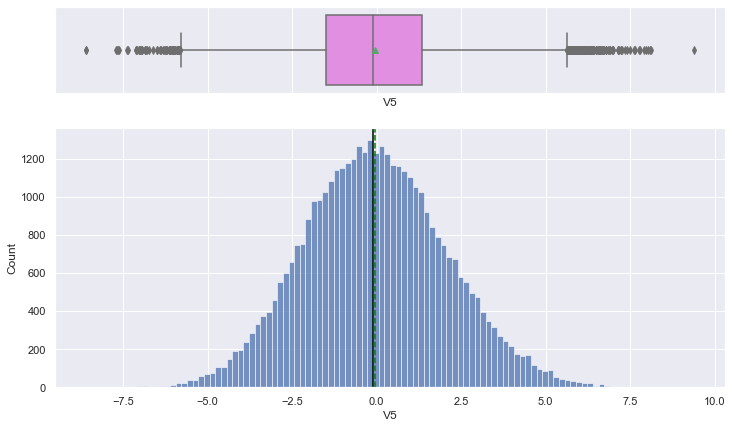

<IPython.core.display.Javascript object>

In [32]:
# Observations on V5
histogram_boxplot(data, "V5")

<AxesSubplot:xlabel='Target', ylabel='V5'>

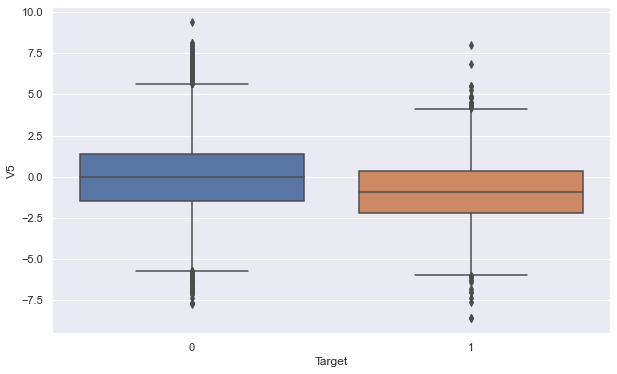

<IPython.core.display.Javascript object>

In [33]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V5", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

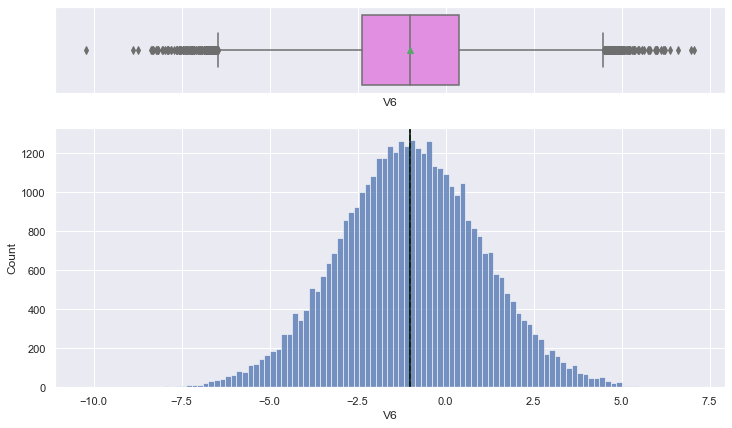

<IPython.core.display.Javascript object>

In [34]:
# Observations on V6
histogram_boxplot(data, "V6")

<AxesSubplot:xlabel='Target', ylabel='V6'>

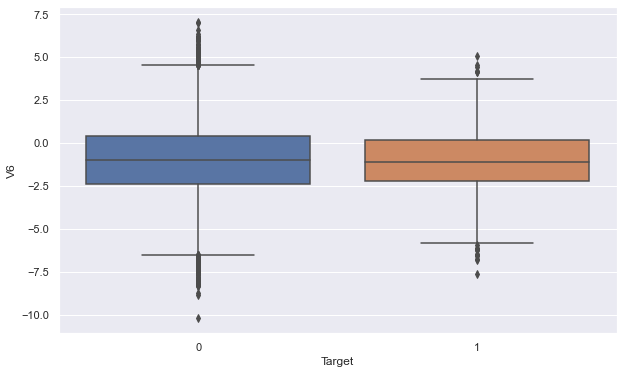

<IPython.core.display.Javascript object>

In [35]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V6", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Normally distributed. Mean ~> Median. 

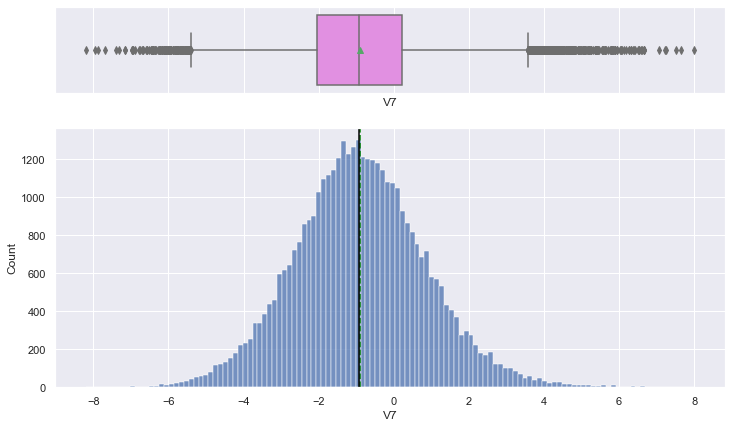

<IPython.core.display.Javascript object>

In [36]:
# Observations on V7
histogram_boxplot(data, "V7")

<AxesSubplot:xlabel='Target', ylabel='V7'>

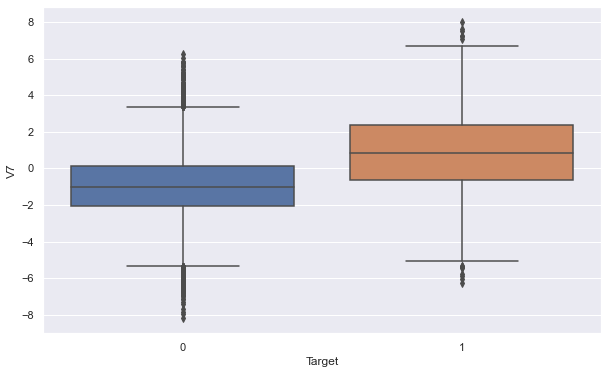

<IPython.core.display.Javascript object>

In [37]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V7", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

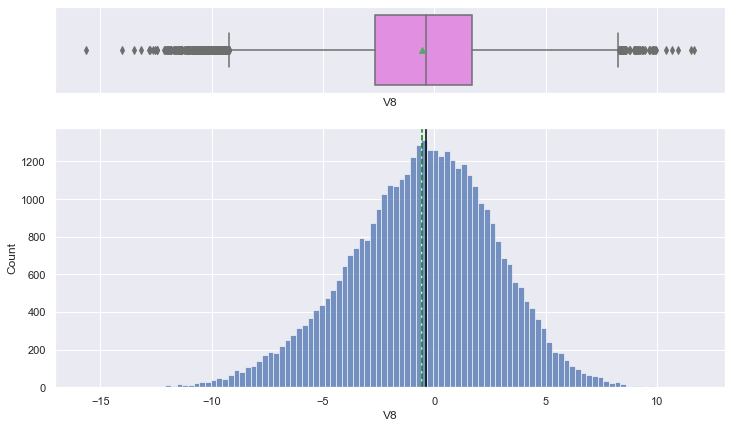

<IPython.core.display.Javascript object>

In [38]:
# Observations on V8
histogram_boxplot(data, "V8")

<AxesSubplot:xlabel='Target', ylabel='V8'>

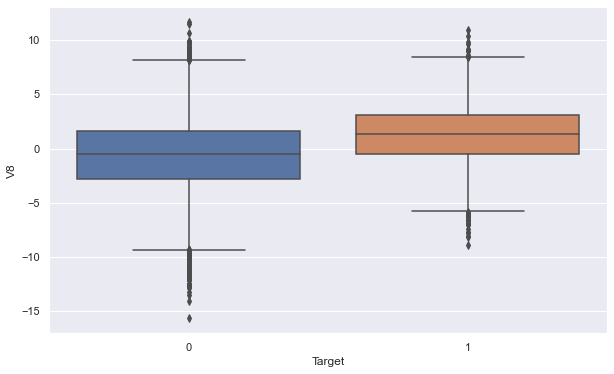

<IPython.core.display.Javascript object>

In [39]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V8", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

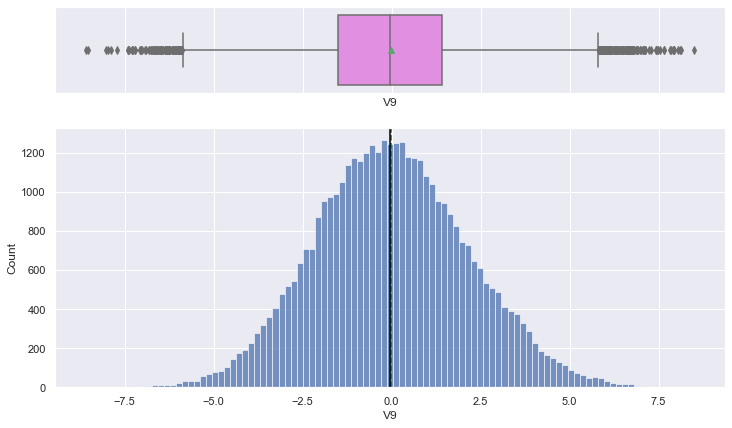

<IPython.core.display.Javascript object>

In [40]:
# Observations on V9
histogram_boxplot(data, "V9")

<AxesSubplot:xlabel='Target', ylabel='V9'>

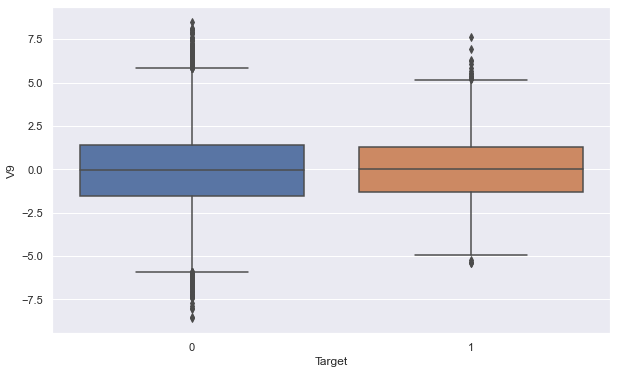

<IPython.core.display.Javascript object>

In [41]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V9", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

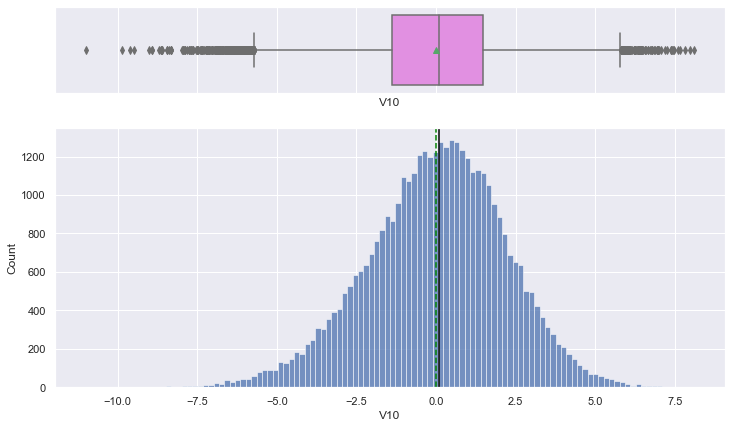

<IPython.core.display.Javascript object>

In [42]:
# Observations on V10
histogram_boxplot(data, "V10")

<AxesSubplot:xlabel='Target', ylabel='V10'>

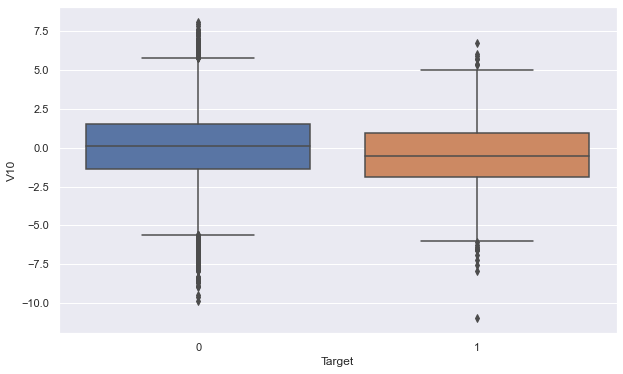

<IPython.core.display.Javascript object>

In [43]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V10", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight lleft skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

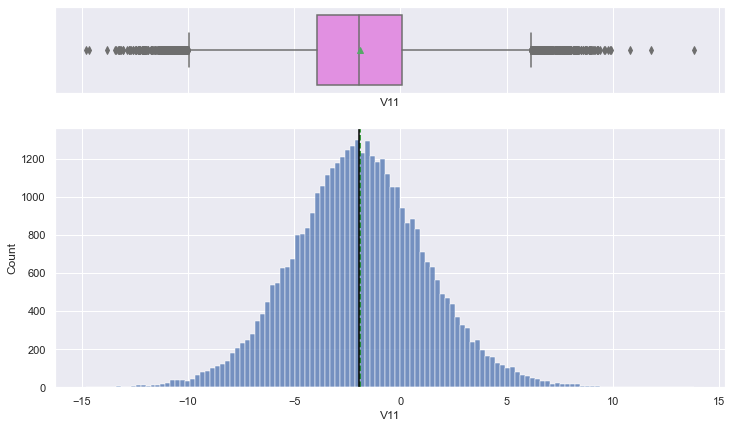

<IPython.core.display.Javascript object>

In [44]:
# Observations on V11
histogram_boxplot(data, "V11")

<AxesSubplot:xlabel='Target', ylabel='V11'>

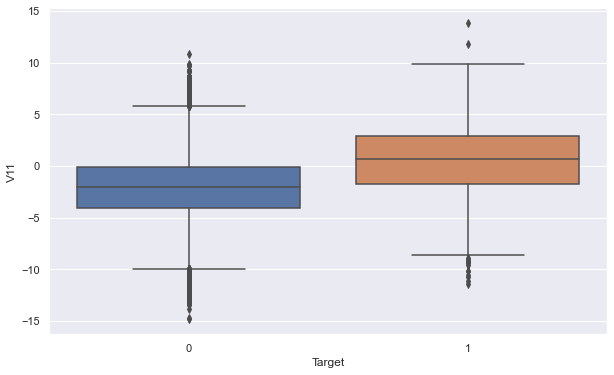

<IPython.core.display.Javascript object>

In [45]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V11", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Median ~> Mean. 

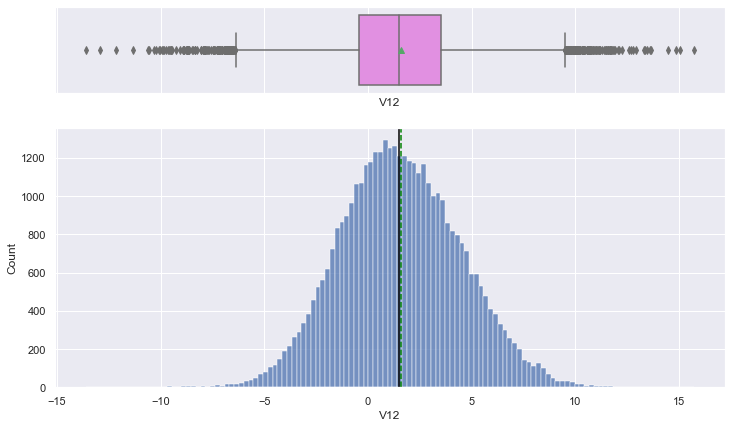

<IPython.core.display.Javascript object>

In [46]:
# Observations on V12
histogram_boxplot(data, "V12")

<AxesSubplot:xlabel='Target', ylabel='V12'>

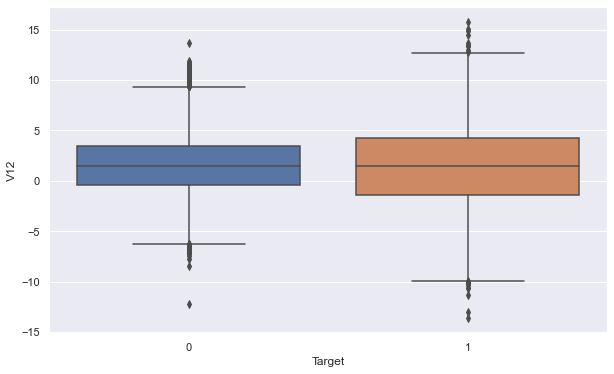

<IPython.core.display.Javascript object>

In [47]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V12", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Median ~> Mean. 

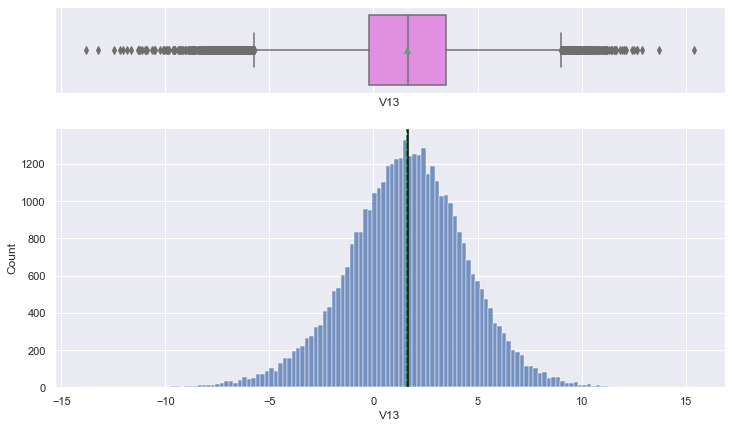

<IPython.core.display.Javascript object>

In [48]:
# Observations on V13
histogram_boxplot(data, "V13")

<AxesSubplot:xlabel='Target', ylabel='V13'>

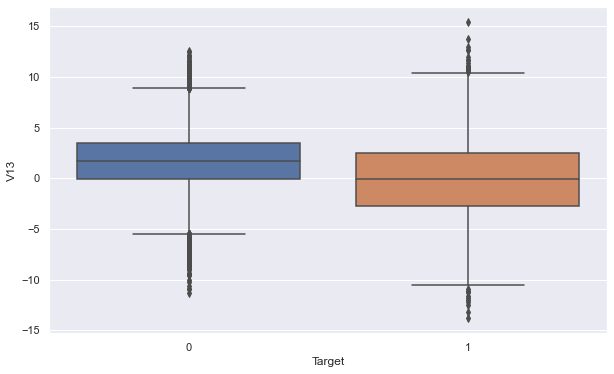

<IPython.core.display.Javascript object>

In [49]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V13", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

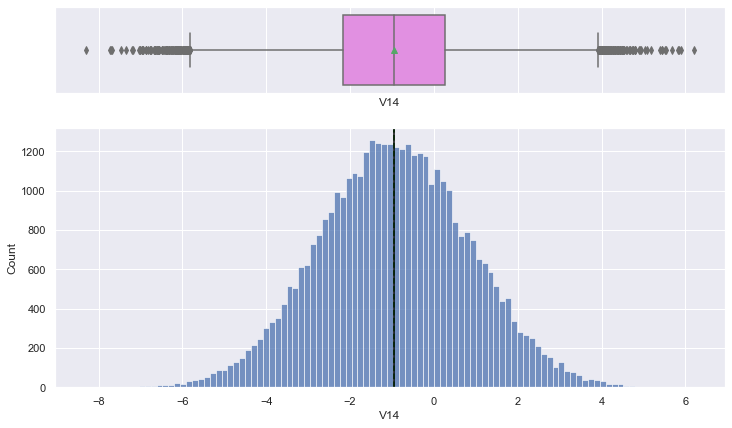

<IPython.core.display.Javascript object>

In [50]:
# Observations on V14
histogram_boxplot(data, "V14")

<AxesSubplot:xlabel='Target', ylabel='V14'>

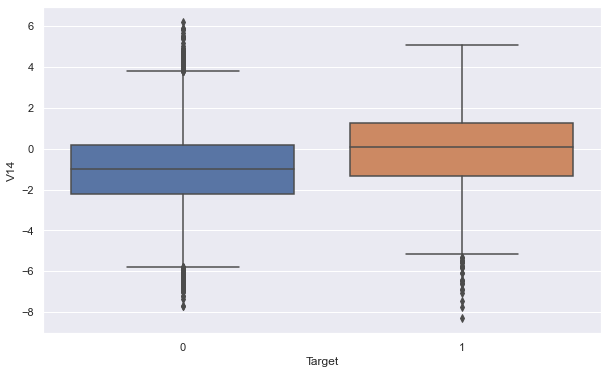

<IPython.core.display.Javascript object>

In [51]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V14", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

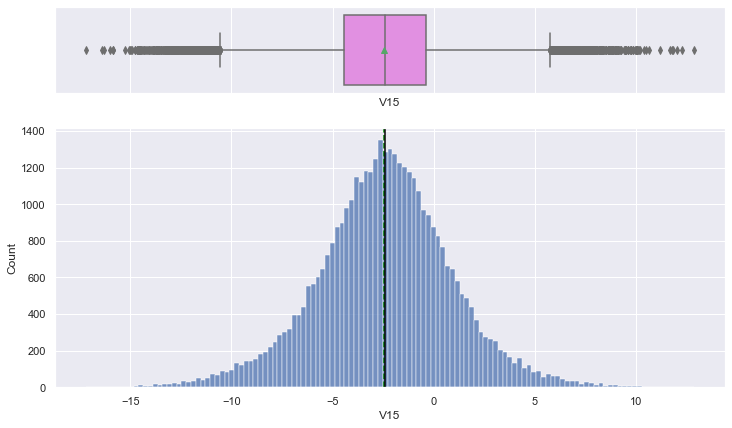

<IPython.core.display.Javascript object>

In [52]:
# Observations on V15
histogram_boxplot(data, "V15")

<AxesSubplot:xlabel='Target', ylabel='V15'>

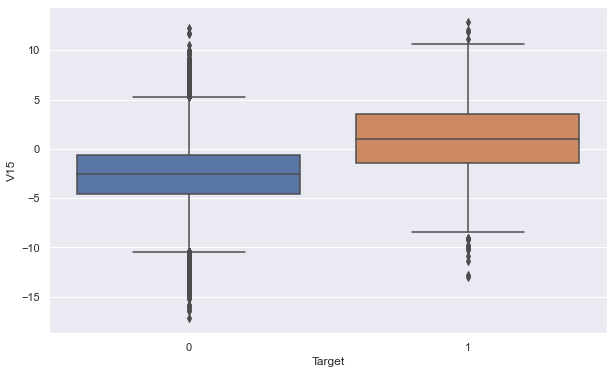

<IPython.core.display.Javascript object>

In [53]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V15", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

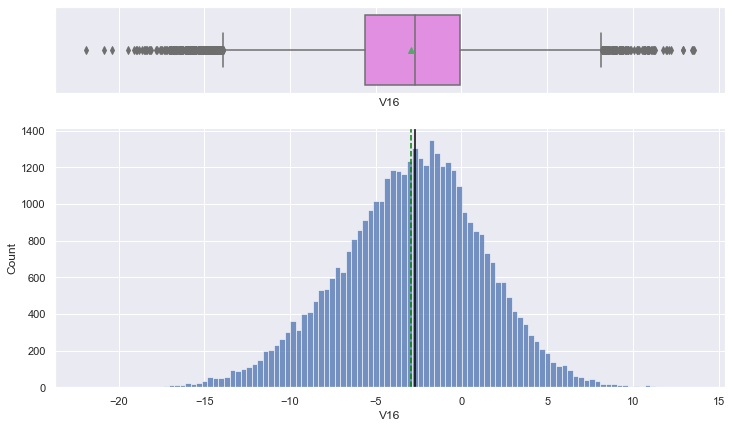

<IPython.core.display.Javascript object>

In [54]:
# Observations on V16
histogram_boxplot(data, "V16")

<AxesSubplot:xlabel='Target', ylabel='V16'>

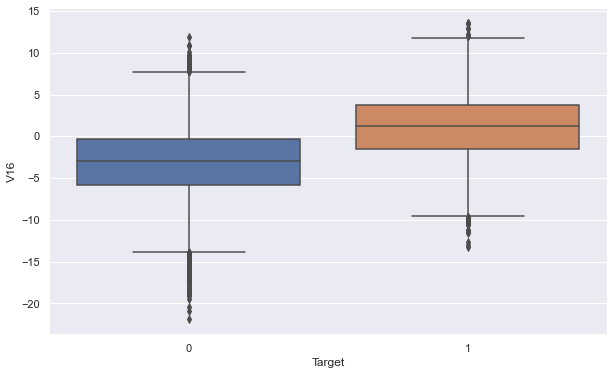

<IPython.core.display.Javascript object>

In [55]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V16", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

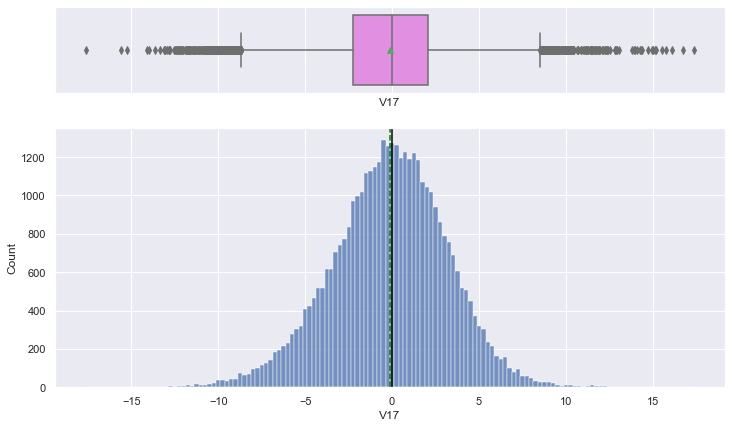

<IPython.core.display.Javascript object>

In [56]:
# Observations on V17
histogram_boxplot(data, "V17")

<AxesSubplot:xlabel='Target', ylabel='V17'>

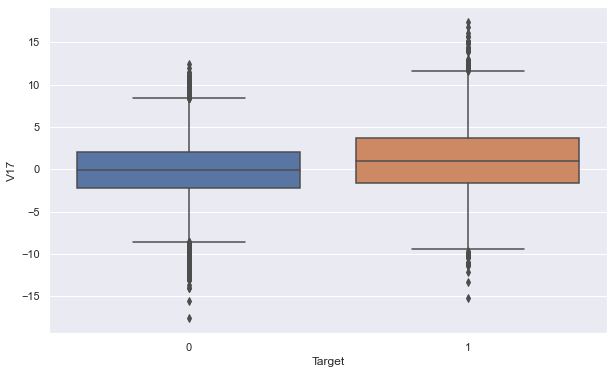

<IPython.core.display.Javascript object>

In [57]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V17", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

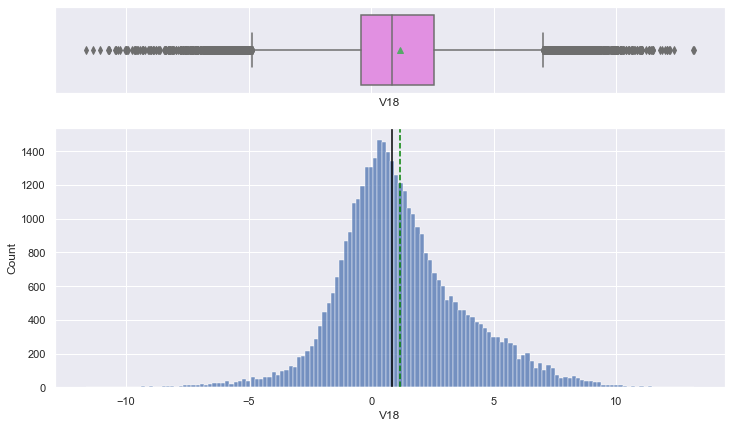

<IPython.core.display.Javascript object>

In [58]:
# Observations on V18
histogram_boxplot(data, "V18")

<AxesSubplot:xlabel='Target', ylabel='V18'>

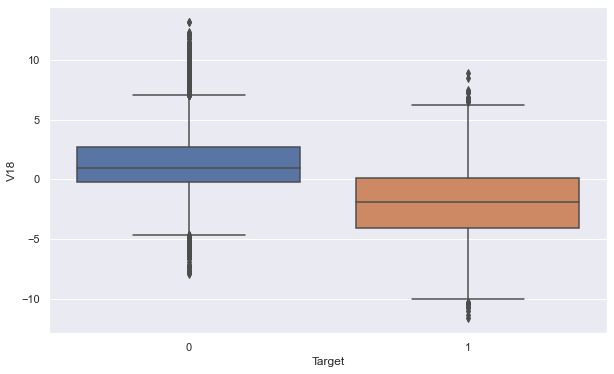

<IPython.core.display.Javascript object>

In [59]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V18", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

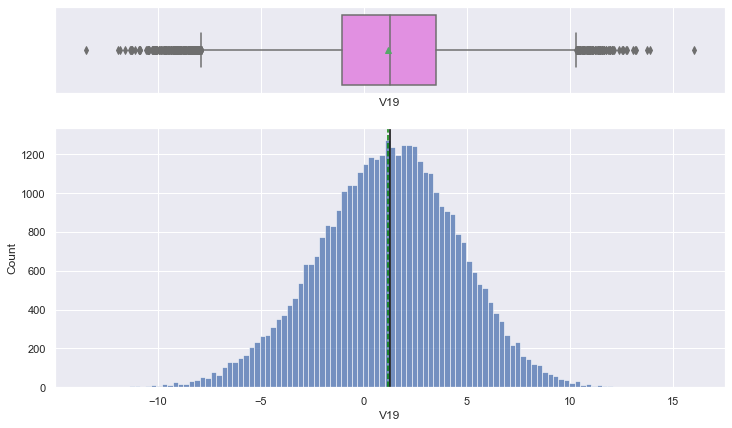

<IPython.core.display.Javascript object>

In [60]:
# Observations on V19
histogram_boxplot(data, "V19")

<AxesSubplot:xlabel='Target', ylabel='V19'>

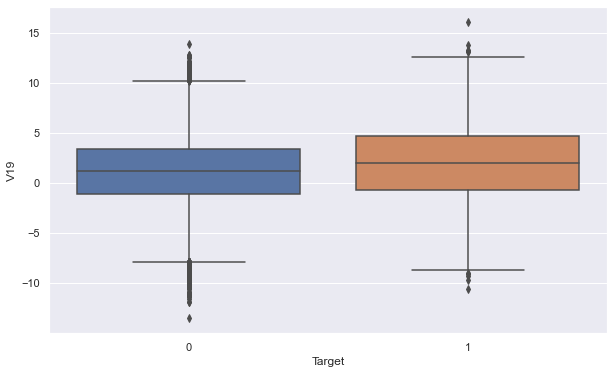

<IPython.core.display.Javascript object>

In [61]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V19", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 
2. Outliers are slightly higher in number on the left side.

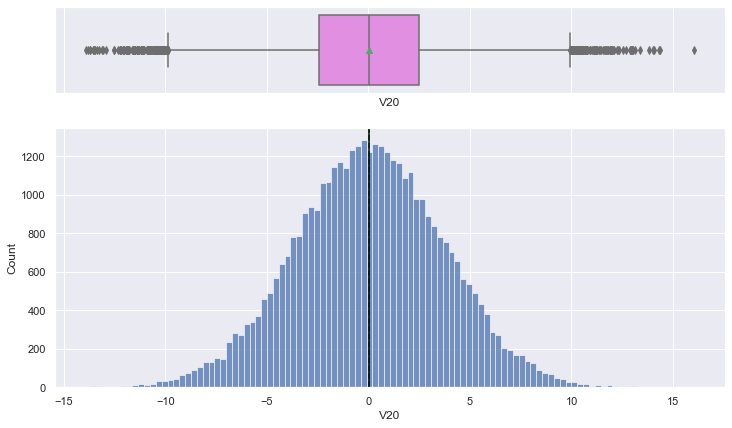

<IPython.core.display.Javascript object>

In [62]:
# Observations on V20
histogram_boxplot(data, "V20")

<AxesSubplot:xlabel='Target', ylabel='V20'>

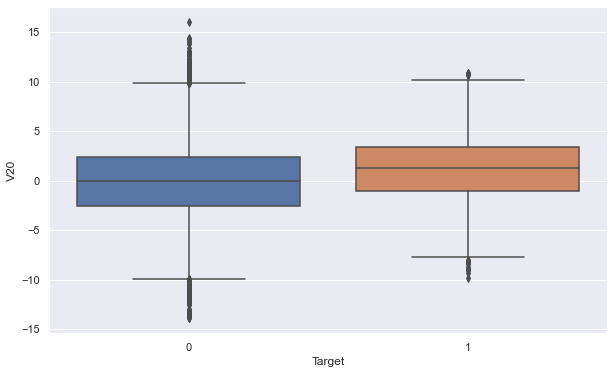

<IPython.core.display.Javascript object>

In [63]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V20", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

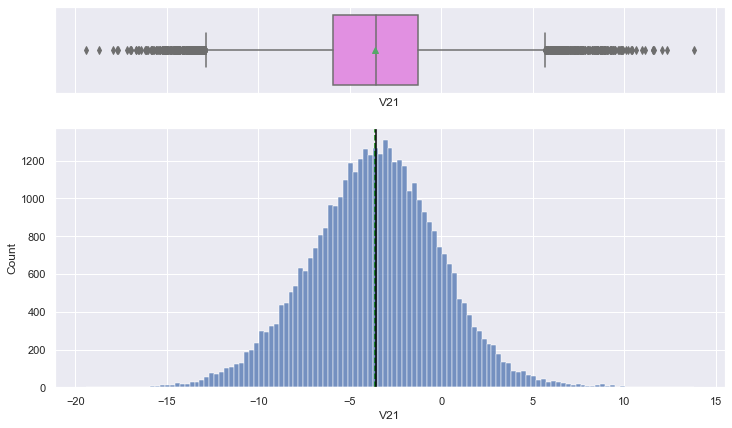

<IPython.core.display.Javascript object>

In [64]:
# Observations on V21
histogram_boxplot(data, "V21")

<AxesSubplot:xlabel='Target', ylabel='V21'>

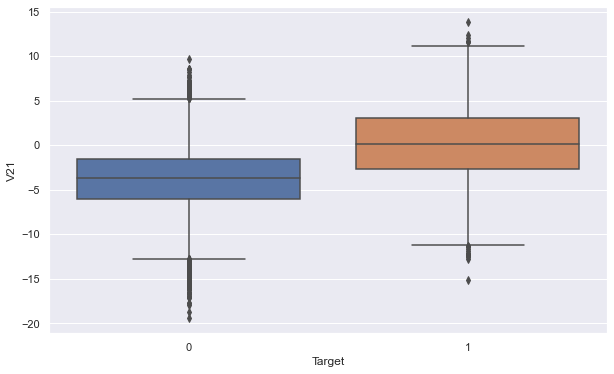

<IPython.core.display.Javascript object>

In [65]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V21", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 

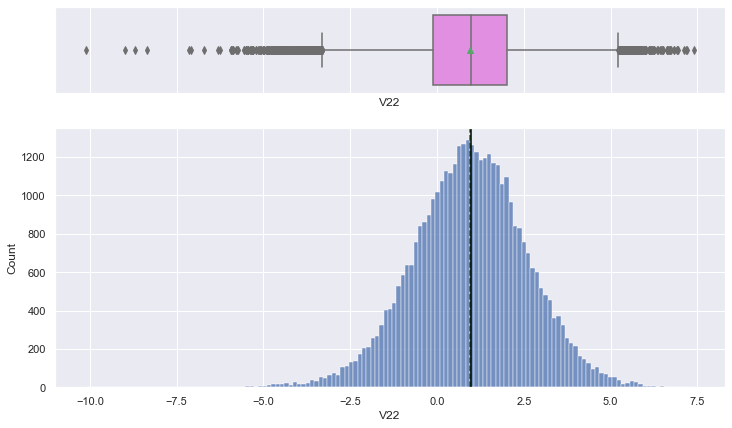

<IPython.core.display.Javascript object>

In [66]:
# Observations on V22
histogram_boxplot(data, "V22")

<AxesSubplot:xlabel='Target', ylabel='V22'>

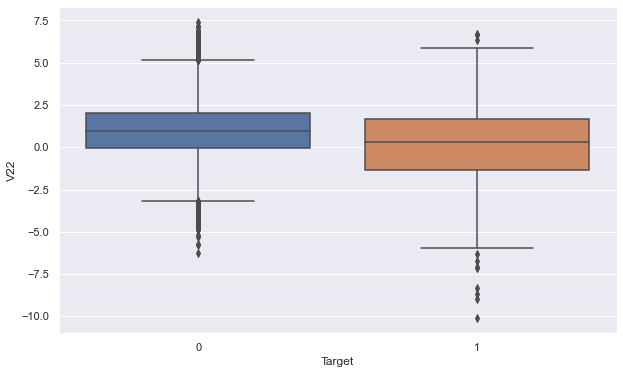

<IPython.core.display.Javascript object>

In [67]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V22", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

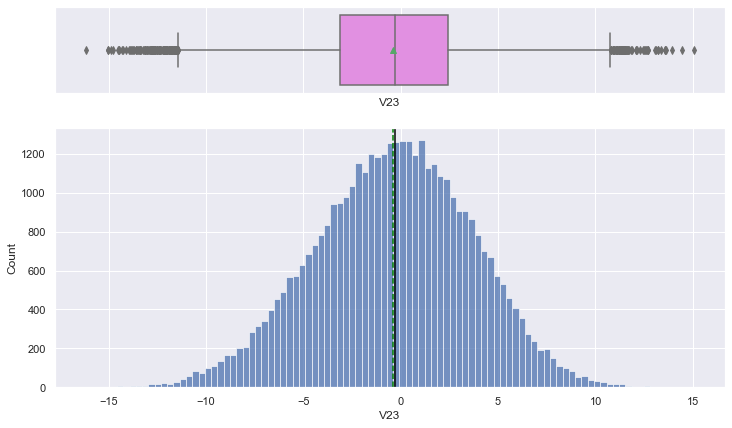

<IPython.core.display.Javascript object>

In [68]:
# Observations on V23
histogram_boxplot(data, "V23")

<AxesSubplot:xlabel='Target', ylabel='V23'>

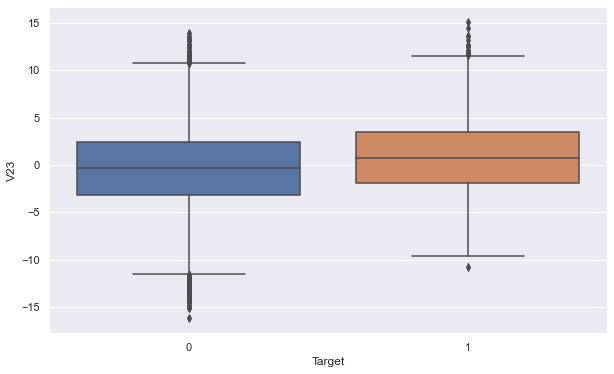

<IPython.core.display.Javascript object>

In [69]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V23", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Median ~> Mean. 

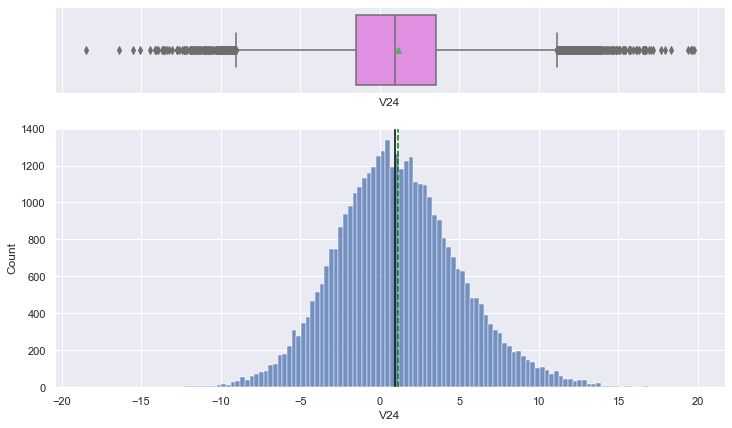

<IPython.core.display.Javascript object>

In [70]:
# Observations on V24
histogram_boxplot(data, "V24")

<AxesSubplot:xlabel='Target', ylabel='V24'>

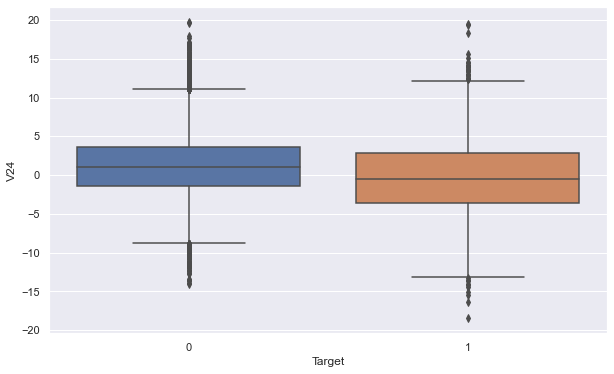

<IPython.core.display.Javascript object>

In [71]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V24", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 

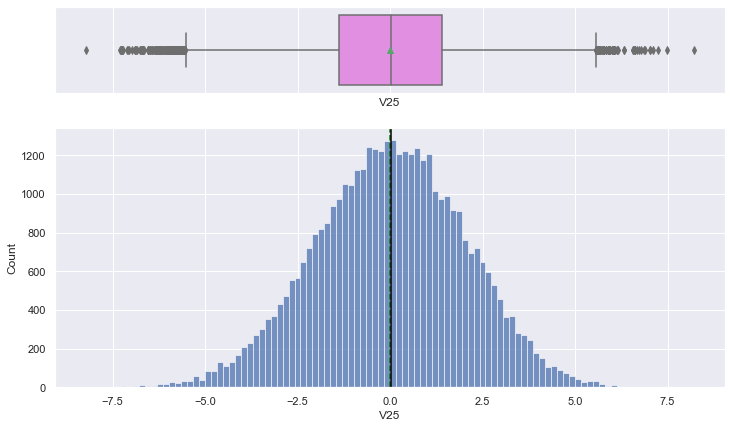

<IPython.core.display.Javascript object>

In [72]:
# Observations on V25
histogram_boxplot(data, "V25")

<AxesSubplot:xlabel='Target', ylabel='V25'>

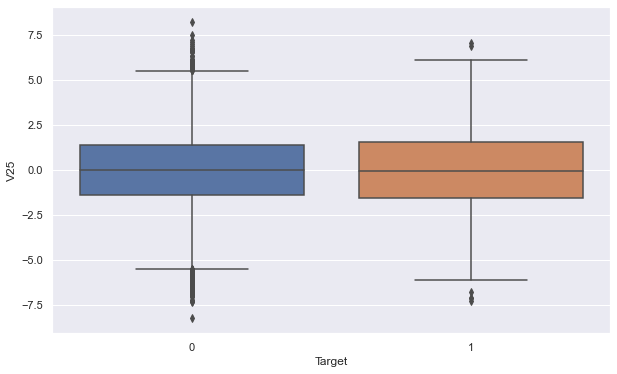

<IPython.core.display.Javascript object>

In [73]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V25", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed Mean ~= Median. 

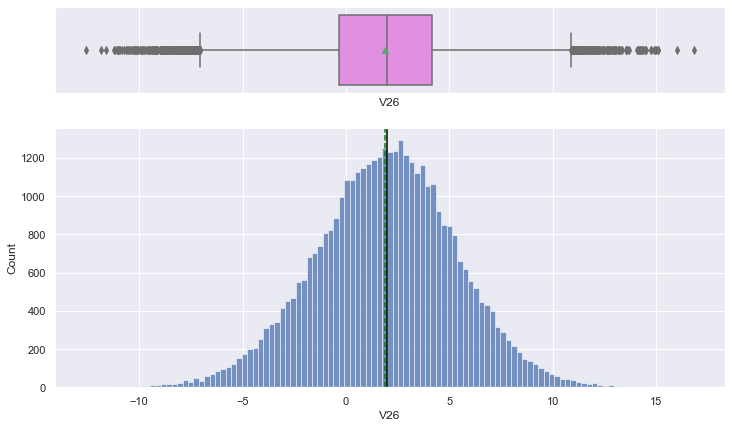

<IPython.core.display.Javascript object>

In [74]:
# Observations on V26
histogram_boxplot(data, "V26")

<AxesSubplot:xlabel='Target', ylabel='V26'>

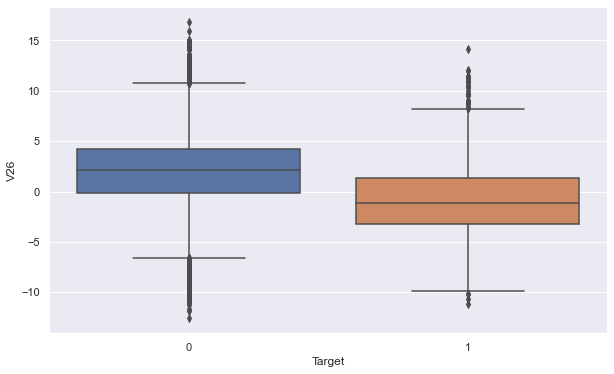

<IPython.core.display.Javascript object>

In [75]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V26", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

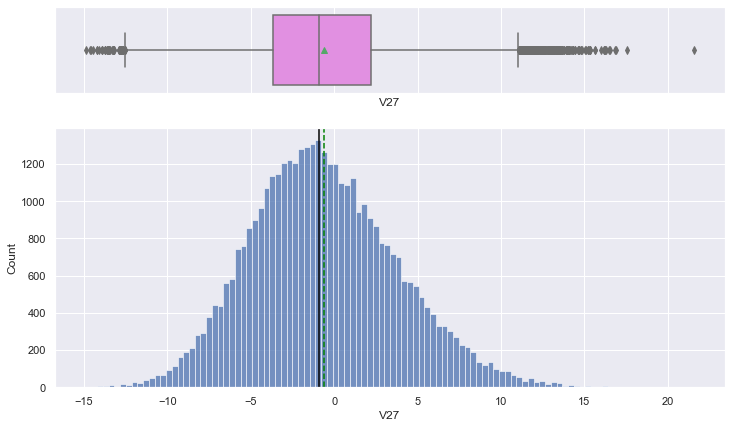

<IPython.core.display.Javascript object>

In [76]:
# Observations on V27
histogram_boxplot(data, "V27")

<AxesSubplot:xlabel='Target', ylabel='V27'>

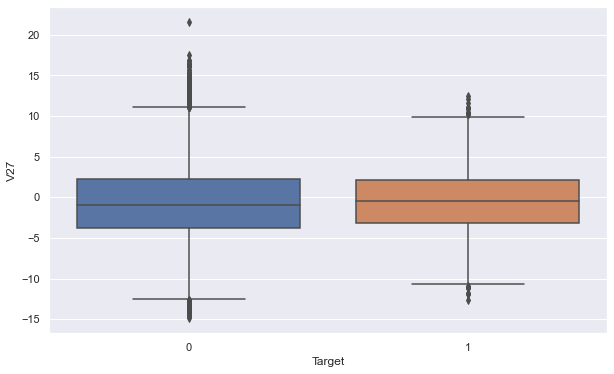

<IPython.core.display.Javascript object>

In [77]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V27", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

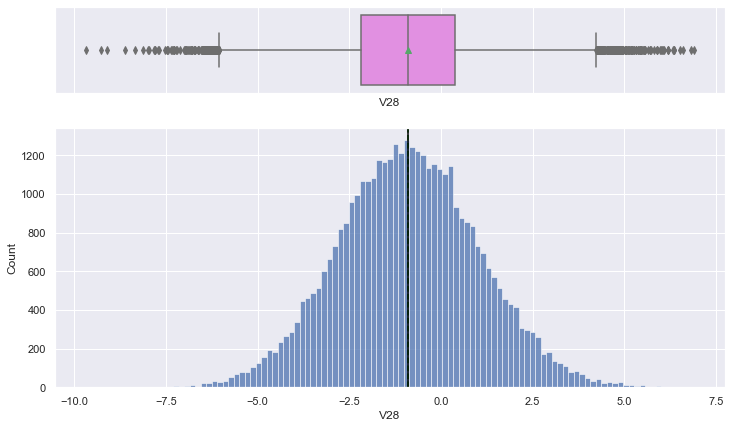

<IPython.core.display.Javascript object>

In [78]:
# Observations on V28
histogram_boxplot(data, "V28")

<AxesSubplot:xlabel='Target', ylabel='V28'>

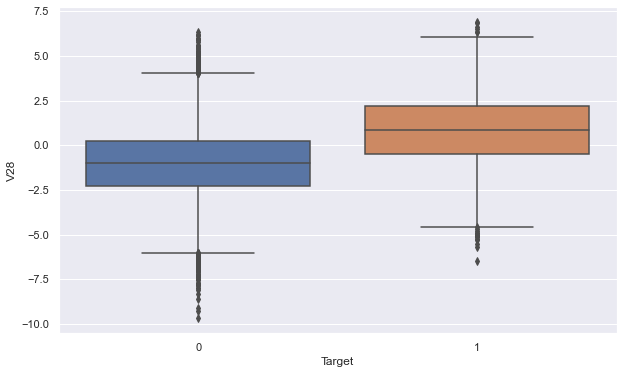

<IPython.core.display.Javascript object>

In [79]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V28", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

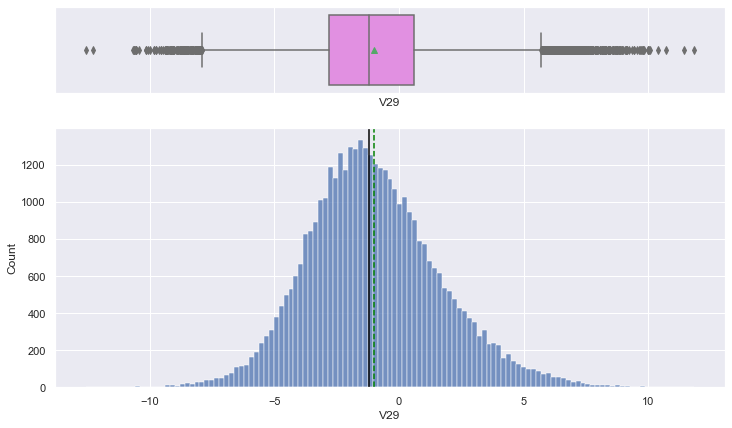

<IPython.core.display.Javascript object>

In [80]:
# Observations on V29
histogram_boxplot(data, "V29")

<AxesSubplot:xlabel='Target', ylabel='V29'>

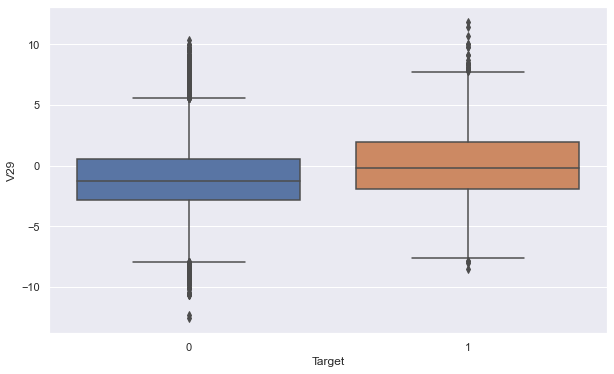

<IPython.core.display.Javascript object>

In [81]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V29", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

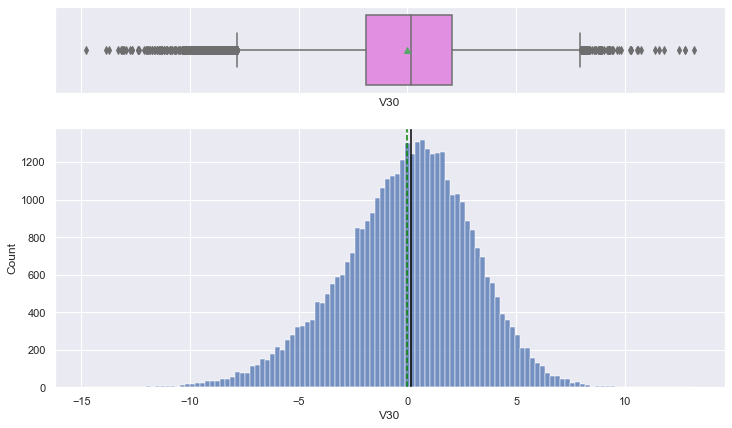

<IPython.core.display.Javascript object>

In [82]:
# Observations on V30
histogram_boxplot(data, "V30")

<AxesSubplot:xlabel='Target', ylabel='V30'>

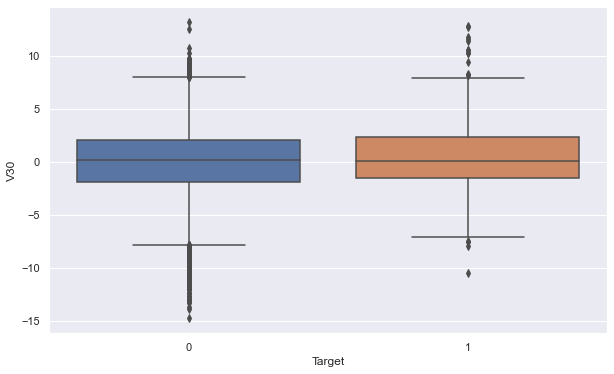

<IPython.core.display.Javascript object>

In [83]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V30", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Mean ~< Median. 

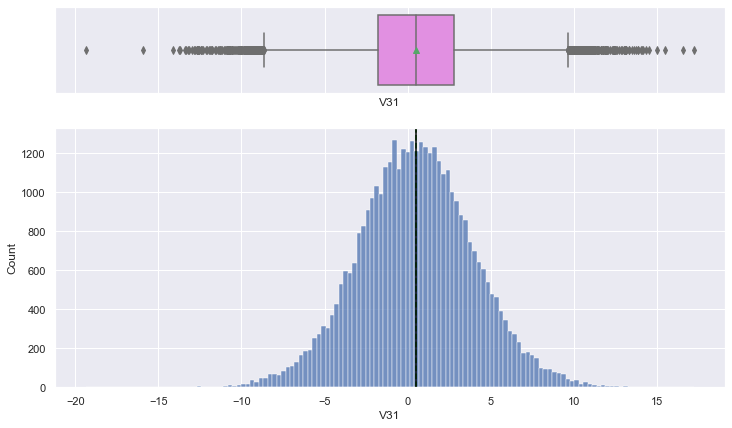

<IPython.core.display.Javascript object>

In [84]:
# Observations on V31
histogram_boxplot(data, "V31")

<AxesSubplot:xlabel='Target', ylabel='V31'>

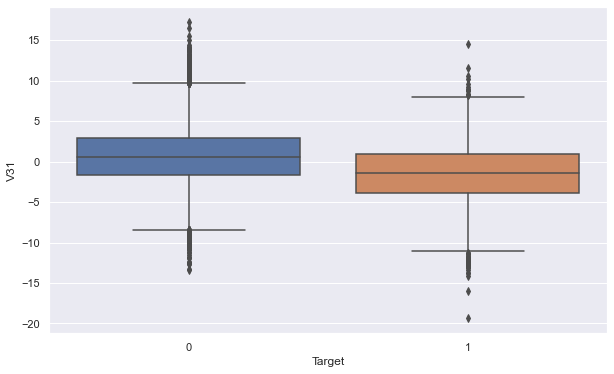

<IPython.core.display.Javascript object>

In [85]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V31", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

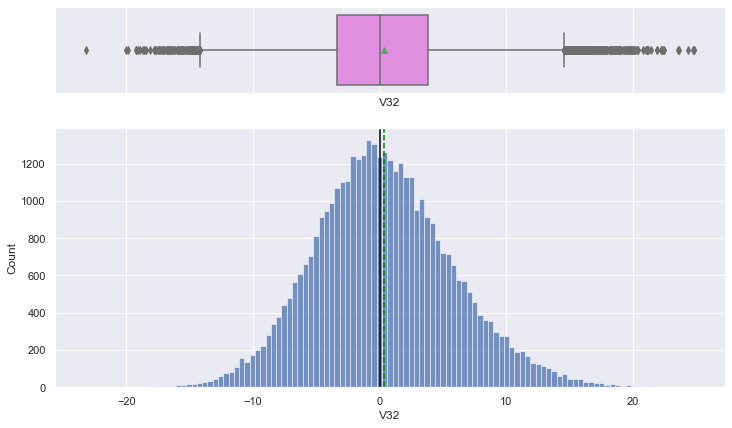

<IPython.core.display.Javascript object>

In [86]:
# Observations on V32
histogram_boxplot(data, "V32")

<AxesSubplot:xlabel='Target', ylabel='V32'>

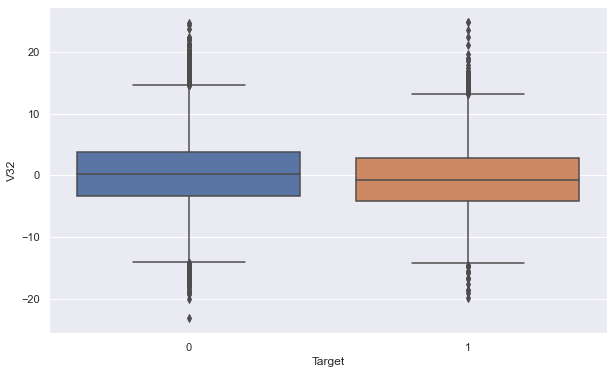

<IPython.core.display.Javascript object>

In [87]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V32", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 

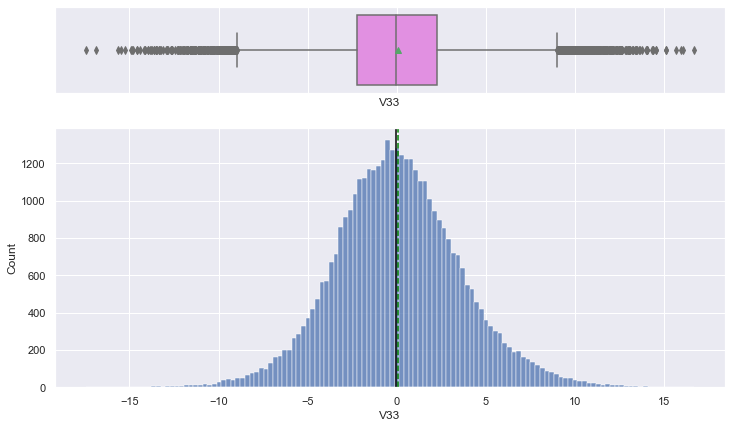

<IPython.core.display.Javascript object>

In [88]:
# Observations on V33
histogram_boxplot(data, "V33")

<AxesSubplot:xlabel='Target', ylabel='V33'>

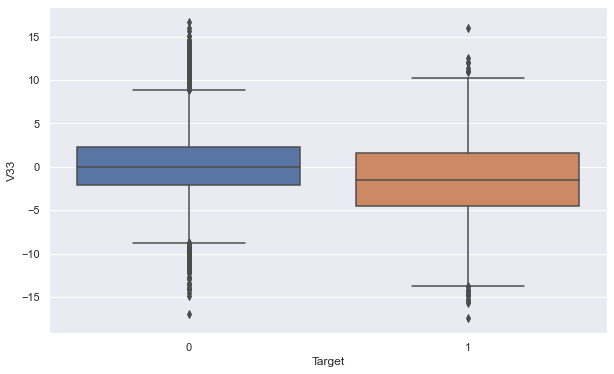

<IPython.core.display.Javascript object>

In [89]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V33", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 

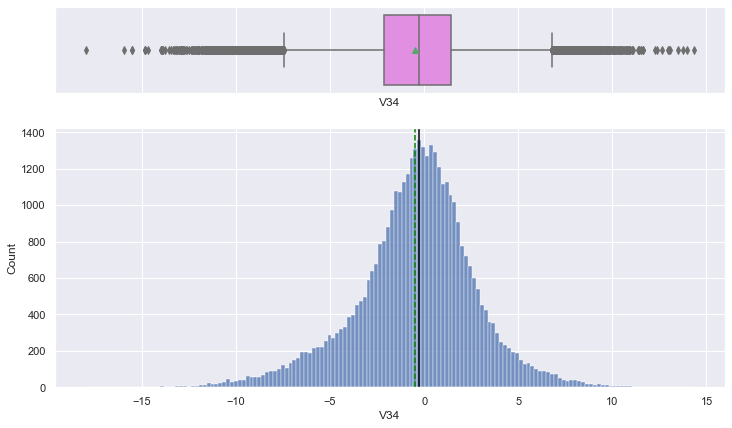

<IPython.core.display.Javascript object>

In [90]:
# Observations on V34
histogram_boxplot(data, "V34")

<AxesSubplot:xlabel='Target', ylabel='V34'>

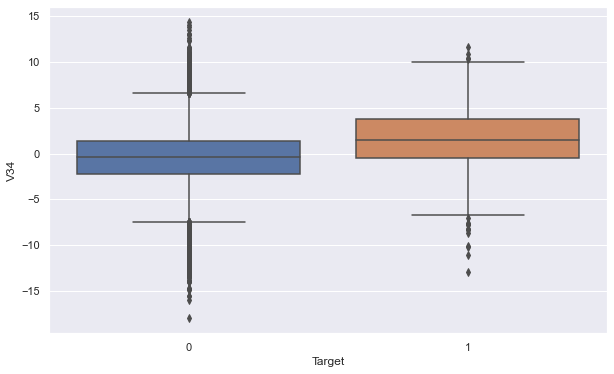

<IPython.core.display.Javascript object>

In [91]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V34", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight left skeweness. Mean ~< Median. 

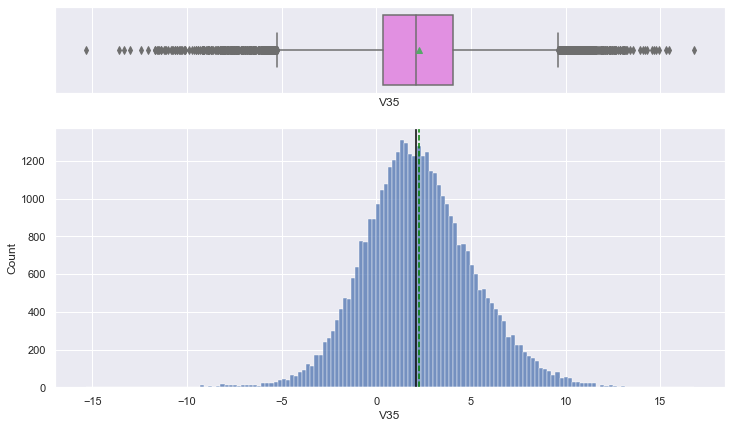

<IPython.core.display.Javascript object>

In [92]:
# Observations on V35
histogram_boxplot(data, "V35")

<AxesSubplot:xlabel='Target', ylabel='V35'>

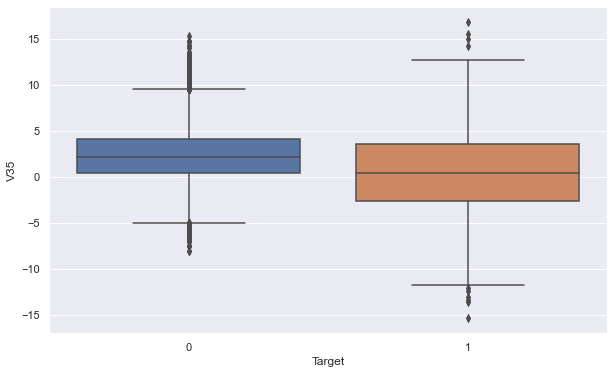

<IPython.core.display.Javascript object>

In [93]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V35", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 

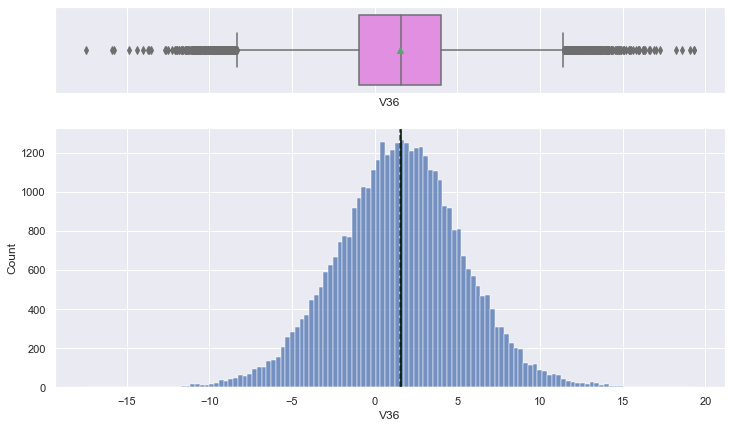

<IPython.core.display.Javascript object>

In [94]:
# Observations on V36
histogram_boxplot(data, "V36")

<AxesSubplot:xlabel='Target', ylabel='V36'>

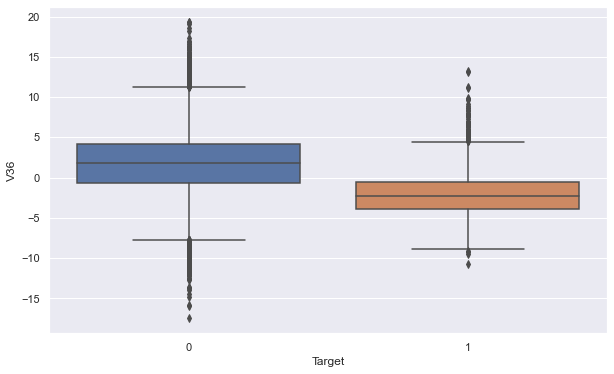

<IPython.core.display.Javascript object>

In [95]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V36", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

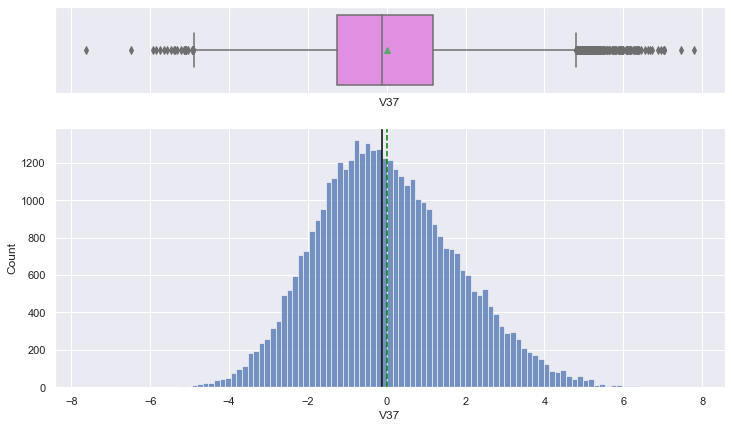

<IPython.core.display.Javascript object>

In [96]:
# Observations on V37
histogram_boxplot(data, "V37")

<AxesSubplot:xlabel='Target', ylabel='V37'>

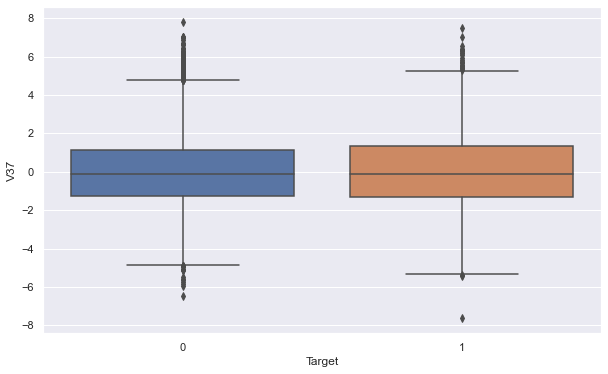

<IPython.core.display.Javascript object>

In [97]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V37", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed, with slight right skeweness. Mean ~> Median. 
2. Outliers are slightly higher in number on the right side.

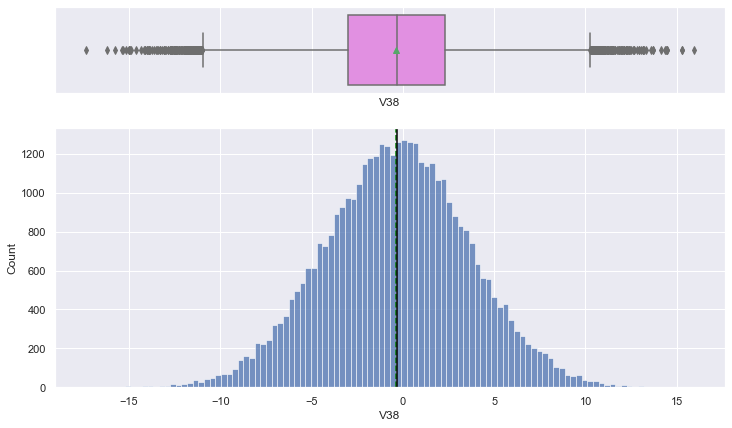

<IPython.core.display.Javascript object>

In [98]:
# Observations on V38
histogram_boxplot(data, "V38")

<AxesSubplot:xlabel='Target', ylabel='V38'>

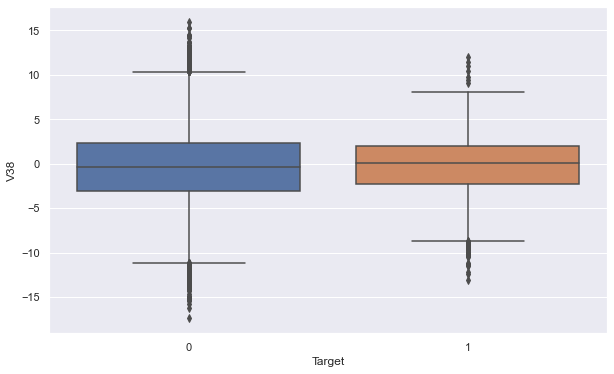

<IPython.core.display.Javascript object>

In [99]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V38", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

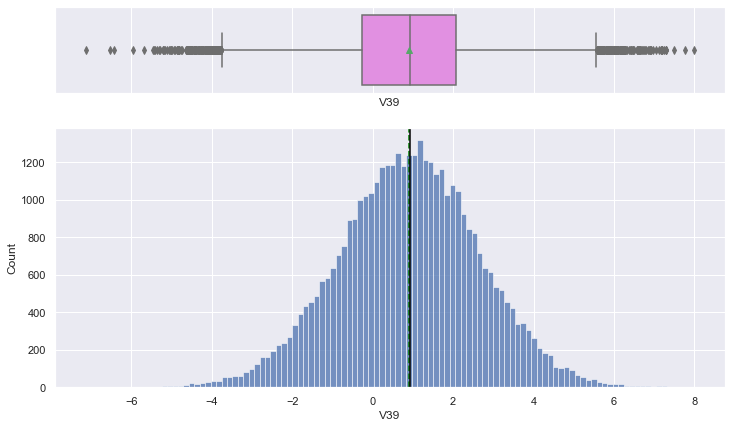

<IPython.core.display.Javascript object>

In [100]:
# Observations on V39
histogram_boxplot(data, "V39")

<AxesSubplot:xlabel='Target', ylabel='V39'>

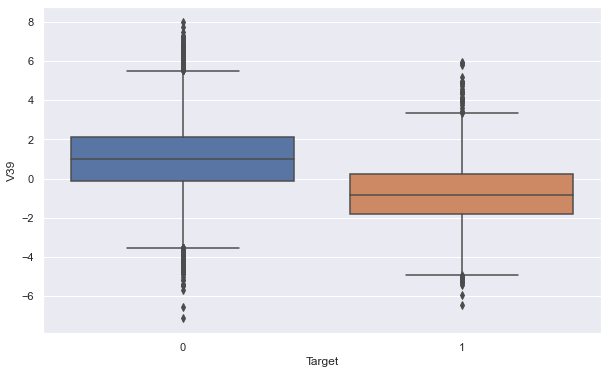

<IPython.core.display.Javascript object>

In [101]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V39", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

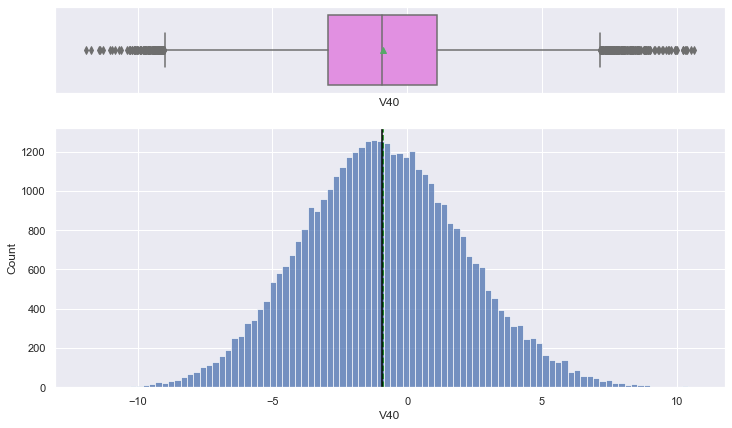

<IPython.core.display.Javascript object>

In [102]:
# Observations on V40
histogram_boxplot(data, "V40")

<AxesSubplot:xlabel='Target', ylabel='V40'>

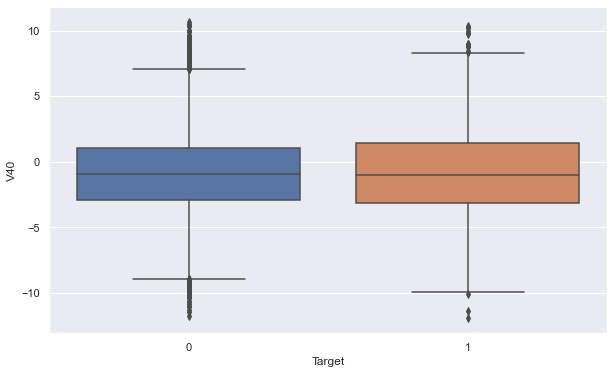

<IPython.core.display.Javascript object>

In [103]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Target", y="V40", data=data, orient="vertical")

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Almost normally distributed. Mean ~= Median. 

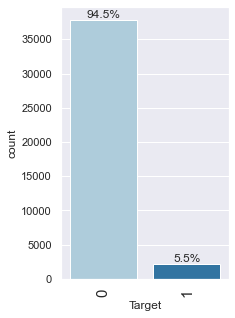

<IPython.core.display.Javascript object>

In [104]:
labeled_barplot(data, "Target", perc=True)

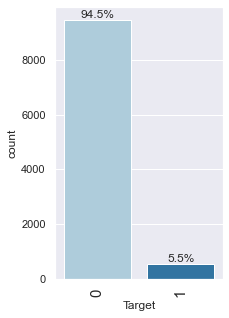

<IPython.core.display.Javascript object>

In [105]:
labeled_barplot(test, "Target", perc=True)

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. 94.5% of the data shows none failure. 
2. Only 5.5% failures deducetd in the dataset. 
3. Target variable is imbalanced. 

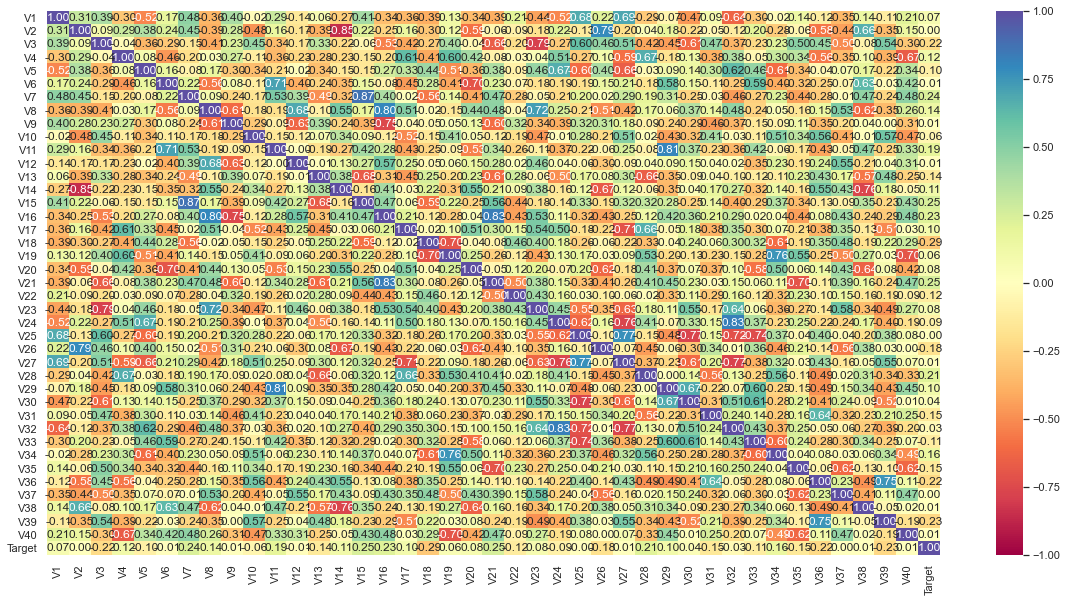

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [107]:
# sns.pairplot(data, hue="Target")

<IPython.core.display.Javascript object>

## EDA and insights

## Data Pre-processing

In [108]:
training_data = data.copy()
test_data = test.copy()

<IPython.core.display.Javascript object>

In [109]:
# Separating target variable and other variables
X = training_data.drop(columns="Target")

y = training_data["Target"]

X_test = test_data.drop(columns="Target")

y_test = test_data["Target"]

<IPython.core.display.Javascript object>

In [110]:
# Splitting training dataset into training and validation sets:
# The problem statement provides the test data and training data separately.
# we only need to split the training set into train and validation, the testing dataset will be used to finally evaluate the model.
# Training dataset will be splited by 75% for training and 25% for validation (this way we can esnure that the validation dataset is indeed equal in size to the testing dataset - Honestly I am not sure if that will be with any adding value to how the model performs with different datasets/information)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [111]:
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

### Missing-Value Treatment
###### As we stated at the data analsyis above, there were missing data identified in both training and testing datasets. No we will be treating those missing values. 

In [112]:
reqd_col_for_impute = ["V1", "V2"]
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
1. Replacement cost - False Negatives - Predicting no failure, while there will be a failure
2. Inspection cost - False Positives - Predicting failure, while there is no failure 
3. Repair cost - True Positives - Predicting failure correctly

### How to reduce the overall cost?
* We need to create a customized metric, that can help to bring down the overall cost.
* The cost associated with any model = TP * 15000 + FP * 5000 + FN * 40000
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN) * 15000
* So, we will try to maximize `Minimum cost/Cost associated with model`

## **Defining scorer to be used for hyperparameter tuning**

- Every prediction of a classification model will be either a TP, FP, FN or TN.
- Till now at most of the places we wanted to reduce False negatives and hence we tried to maximize "Recall".
- To maximize Recall, we used Recall as a **scorer** in hyperparameter tuning.
- Here, we not only want to minimize false negatives but also false positives and we are also given the costs associated with each type of prediction.
- So, overall we want to reduce the maintenance cost which is: `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
- In simple language, we can say that we are assigning different weightage to the different types of predictions.
- Do we have any such metric which can help us minimize the maintenance cost? i.e., help us reduce FP and FN as per the weightage - We don't have any such inbuilt metric.
- In sklearn, we can define **custom scorers** also as per our need.
- For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
  - Minimize (maintenance cost)
  - Maximize (1/maintenance cost)
  - Maximize (minimum possible maintenance cost/maintenance cost)
- Eventually, all 3 metrics will do the same work in the backend and the only difference will be in the scale of the values of the metric.

- The metric provided in the next cell is to `maximize(minimum possible maintenance cost/maintenance cost)`
- You can modify the metric as per convenience and use it further to tune the models.

In [113]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

<IPython.core.display.Javascript object>

## Model Building with Original data

In [114]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# results = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models
# score = []
# # loop through all models to get the mean cross validated score
# print("\n" "Cross-Validation Performance:" "\n")
# for name, model in models:
#     scoring = "recall"
#     kfold = StratifiedKFold(
#         n_splits=5, shuffle=True, random_state=1
#     )  # Setting number of splits equal to 5
#     cv_result = cross_val_score(
#         estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
#     )
#     results.append(cv_result)
#     names.append(name)
#     print("{}: {}".format(name, cv_result.mean() * 100))

# print("\n" "Validation Performance:" "\n")

# for name, model in models:
#     model.fit(X_train, y_train)
#     scores = recall_score(y_val, model.predict(X_val))
#     score.append(scores)
#     print("{}: {}".format(name, scores))

<IPython.core.display.Javascript object>

In [115]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 73.47560975609755
Random forest: 76.21951219512194
GBM: 71.70731707317073
Adaboost: 61.46341463414634
Xgboost: 82.1951219512195
dtree: 73.17073170731707

Training Performance:

Bagging: 94.45121951219512
Random forest: 100.0
GBM: 78.04878048780488
Adaboost: 63.71951219512195
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

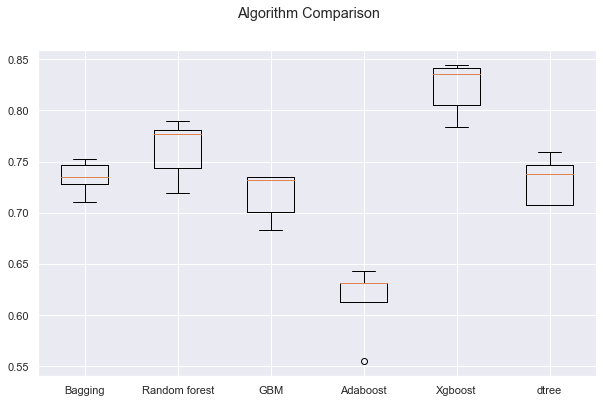

<IPython.core.display.Javascript object>

In [116]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. The three models with the highes perfromance on cross validation are: Xgboost, Random Forest and Bagging (although dtree seems to provide close performance as Bagging). 
2. Only AdaBoost seems to have an outlier. 
3. We will test the possibility of improving the performance with Over and Under sampling. 

## Model Building with Oversampled data


In [117]:
# Synthetic Minority Over Sampling Technique
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

In [118]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# results = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models


# # loop through all models to get the mean cross validated score
# print("\n" "Cross-Validation Performance:" "\n")

# for name, model in models:
#     scoring = scorer
#     kfold = StratifiedKFold(
#         n_splits=5, shuffle=True, random_state=1
#     )  # Setting number of splits equal to 5
#     cv_result = cross_val_score(
#         estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
#     )
#     results.append(cv_result)
#     names.append(name)
#     print("{}: {}".format(name, cv_result.mean() * 100))

# print("\n" "Training Performance:" "\n")

# for name, model in models:
#     model.fit(X_train_over, y_train_over)
#     scores = Minimum_Vs_Model_cost(y_train_over, model.predict(X_train_over)) * 100
#     print("{}: {}".format(name, scores))

<IPython.core.display.Javascript object>

In [119]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = Minimum_Vs_Model_cost(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))

# print("\n" "Validation Performance:" "\n")

# for name, model in models:
#     model.fit(X_train_over, y_train_over)
#     scores = recall_score(y_val, model.predict(X_val))
#     score.append(scores)
#     print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 97.24612129760224
Random forest: 98.15937940761636
GBM: 91.50211565585332
Adaboost: 89.14315937940762
Xgboost: 98.41325811001411
dtree: 97.05923836389282

Training Performance:

Bagging: 99.70818830643744
Random forest: 100.0
GBM: 87.107871242526
Adaboost: 82.93286804628175
Xgboost: 99.75845977065404
dtree: 100.0


<IPython.core.display.Javascript object>

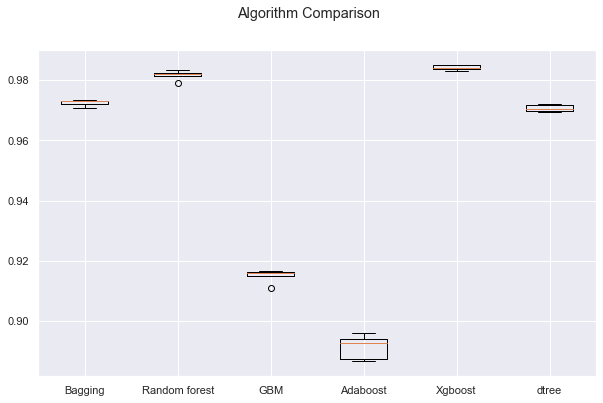

<IPython.core.display.Javascript object>

In [120]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. The three models with the highest perfromance on cross validation are: Xgboost, Random Forest and Bagging again (similar to the original data results. 
2. Performance has improved with oversamplling on training data, also, the model is able generalizing on validation dataset. Seems as Overfitting. 
3. In case of no noticed overfitting, we may not need to check for Overfitting with Regulization. 

## Model Building with Undersampled data

In [121]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

In [122]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = Minimum_Vs_Model_cost(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


# print("\n" "Training Performance:" "\n")

# for name, model in models:
#     model.fit(X_train_un, y_train_un)
#     scores = recall_score(y_val, model.predict(X_val))
#     score.append(scores)
#     print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 87.6219512195122
Random forest: 89.8780487804878
GBM: 88.78048780487806
Adaboost: 87.25609756097562
Xgboost: 89.32926829268293
dtree: 85.91463414634146

Training Performance:

Bagging: 96.60318083644216
Random forest: 100.0
GBM: 87.63804773779836
Adaboost: 83.05199189736663
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

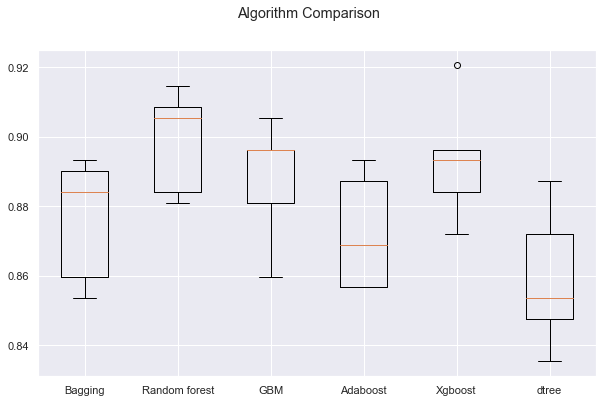

<IPython.core.display.Javascript object>

In [123]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. The three models with the highest perfromance on cross validation are: Xgboost, Random Forest and GBM.
2. Performance has improved with oversamplling on training data in comparision to the original data, however, it performed less in comparision to the oversamplling technique. 
3. Maybe due to loss of information, the model was not able to generalize the outcome. 

## Model Selection

### <span style="font-family: Arial; font-weight:bold; color:dark orangered"> Observations
1. Based on the above results of Original dataset, Over-sampling, and Under-sampling. We noticed improvement in model peformance using the Over-sampling technique. 
2. The over-sampling modles did not cause overfitting and hence no need to apply any regularization. 
3. Models selected based on Over-sampling to be tuned are the followings:
    a) XGBoost, 
    b) Random Forest, and 
    c) Bagging. 

## HyperparameterTuning 

- **Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

#### For XGBoost:
param_grid={'n_estimators':np.arange(150,300,50),'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2], 'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

#### For Gradient Boosting:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]}


#### For Adaboost:
param_grid = {
    "n_estimators": np.arange(10, 110, 20),
    "learning_rate": [ 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)]}

#### For logistic Regression:
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#### For Bagging Classifier:
param_grid = {
              'max_samples': [0.8,0.9], 
              'max_features': [0.8,0.9],
              'n_estimators' : [40,50]}

#### For Random Forest:
param_grid = {
    "n_estimators": [150,250],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": ['sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1)}

#### For Decision Trees:
param_grid = {'max_depth': np.arange(2,20), 
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001]
             }

**We will tune xgboost, Random Forest, and Bagging models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [124]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost / Cost
    )  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [125]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## XGBoost

### GridSearchCV  

In [126]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'gamma': 3, 'learning_rate': 0.1, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9960155148095909:
Wall time: 2h 49min 14s


<IPython.core.display.Javascript object>

In [127]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=200,
    scale_pos_weight=10,
    subsample=0.9,
    learning_rate=0.1,
    gamma=3,
    eval_metric="logloss",
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [128]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,1.000,0.980,0.990,0.993


<IPython.core.display.Javascript object>

In [129]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.966,0.907,0.634,0.746,0.752


<IPython.core.display.Javascript object>

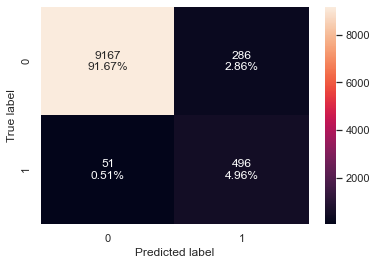

<IPython.core.display.Javascript object>

In [130]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

### RandomizedSearchCV

In [131]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9960155148095909:
Wall time: 1h 45min 1s


<IPython.core.display.Javascript object>

In [132]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=200,
    scale_pos_weight=10,
    gamma=3,
    subsample=0.9,
    learning_rate=0.1,
    eval_metric="logloss",
)
# Fit the model on training data
xgb_tuned2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [133]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,1.000,0.980,0.990,0.993


<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.966,0.907,0.634,0.746,0.752


<IPython.core.display.Javascript object>

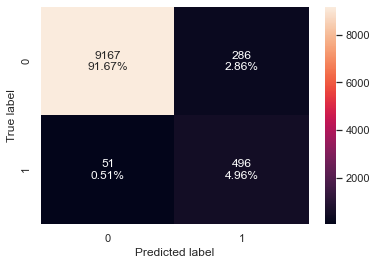

<IPython.core.display.Javascript object>

In [135]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

## Random Forest

### GridSearchCV

In [ ]:
%%time 

#defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid=param_grid = { "n_estimators": [150,250], "min_samples_leaf": np.arange(1, 3), "max_features": ['sqrt','log2'], "max_samples": np.arange(0.2, 0.6, 0.1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

In [ ]:
For Random Forest:
param_grid = { "n_estimators": [150,250], "min_samples_leaf": np.arange(1, 3), "max_features": ['sqrt','log2'], "max_samples": np.arange(0.2, 0.6, 0.1)}

## Model Performance comparison and choosing the final model

## Test set final performance

## Pipelines to build the final model


# Business Insights and Conclusions